##### Soruce for Dataset: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

##### Importing dataset and modules required for Analysis:

In [1]:
# Importing libraries and database:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()

pokE_path = "./pokedex_(Update_04.21).csv" 
pokedex = pd.read_csv(pokE_path)

# agains_? columns give Damage Multiplier values.
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


In [2]:
# REMOVAL OF ASSUMED 'USELESS' COLUMNS:

# Dropping the un-named index column and German/Japanese names under the assumption 
# that these columns ***do not hold any "useful" relation*** to any other column of the for any given index of the database
# and a Pokemon may be defined completely without considering them in these variables.
pokedex.drop(columns=pokedex.columns[[0,3,4]],inplace=True)

##### A view of the Data and a description of Features:

In [3]:
# A view of columns 0 to 13: (Name, Species, Status, Type, Abilities, Height, Weight)
pokedex.iloc[0:8,0:14]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power
5,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,2,Blaze,NaN,Solar Power
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power
7,6,Mega Charizard X,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,1,Tough Claws,NaN,NaN


In [4]:
# A view of columns 14 to 29: (Pokemon Metrics, Egg Type, Base Experience)
pokedex.iloc[0:8,14:30]

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
0,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0
1,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0
2,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0
3,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0
4,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0
5,405,58,64,58,80,65,80,45.0,70.0,142.0,Medium Slow,2,Dragon,Monster,87.5,20.0
6,534,78,84,78,109,85,100,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0
7,634,78,130,111,130,85,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0


In [5]:
# A view of columns 30 to 47: (Damage Multiplier columns)
pokedex.iloc[0:8,30:48]

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.00,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.50,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,1.0,0.50,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


In [6]:
# A description of the data:
def desc_col(series:pd.Series):
        data = {
                "Count":series.count(),
                "Missing": series.isnull().sum(),
                "Unique Count": series.unique().size,
                "Data Type":series.dtype,
                "Mean": (np.nan if (np.issubdtype(series.dtype,object)) else series.mean()),
                "Deviation": (np.nan if (np.issubdtype(series.dtype,object)) else series.std()),
                "Minimum": (np.nan if (np.issubdtype(series.dtype,object)) else series.min()),
                "Maximum": (np.nan if (np.issubdtype(series.dtype,object)) else series.max()),
        }
        return pd.Series(data)


"""
Analysis that follows is based on the following assumption: 

        The list of 48 variables/features, describes and defines (**NOT NECESSARILY COMPLETELY**)
        any given "Pokemon".(i.e. 2 distinct "Pokemon" may exist which have 
        all 48 features in common, but no "Pokemon" may be completely defined without any of these 48 features.)

        Furthermore, let us assume, for the sake of simplicity of our analysis, that all 'object' type variables 
        are of "categorical" nature. That is to say, the only significant and meaningful property of a Pokemon(by our definition) 
        represented by the values of these variables is their distinct nature. The only "useful" property of the different 
        values of a categorical variable is their "difference"/distinction, with respect to their role played in defining a Pokemon. 
        The exact symbolic representation of them is arbitrary and purely based on convention/preference.
        (One such variable which is exception to this assumption: 'name')

Hence, the question that will forever remain un-answered, despite any form of analysis possible: What is a Pokemon?
"""

pokedex.apply(desc_col,axis="index").T.reset_index()

,index,Count,Missing,Unique Count,Data Type,Mean,Deviation,Minimum,Maximum
0,pokedex_number,1045,0,898,int64,440.769378,262.517231,1,898
1,name,1045,0,1045,object,NaN,NaN,NaN,NaN
2,generation,1045,0,8,int64,4.098565,2.272788,1,8
3,status,1045,0,4,object,NaN,NaN,NaN,NaN
4,species,1045,0,652,object,NaN,NaN,NaN,NaN
5,type_number,1045,0,2,int64,1.529187,0.499386,1,2
6,type_1,1045,0,18,object,NaN,NaN,NaN,NaN
7,type_2,553,492,19,object,NaN,NaN,NaN,NaN
8,height_m,1045,0,61,float64,1.374067,3.353349,0.1,100.0
9,weight_kg,1044,1,474,float64,71.216571,132.259911,0.1,999.9


##### Data Cleaning, Data Preperation, Feature Imputation and Compression:

In [7]:
# Exploring the 'type_number' column:

# The 'type_number' of a Pokemon, ideally describes the number of 
# Types that a Pokemon has: Either 1(Pure Type) or 2(Mixed Type).
# Let us verify whether this fact holds for the given data.

type_num_count = pokedex['type_number'].value_counts().sort_index()

print(type_num_count.size)
# The 'type_number' column has 2 unique values, possibly to distinguish
# between "Pure Type" and "Mixed Type".

# Check if any Pokemon with 'type_number' 2 has NaN 'type_2' column
print("Does any exception exist:",(pokedex.loc[(pokedex['type_number']==2)])['type_2'].isnull().any())

# Check if any Pokemon with 'type_number' 1 has non-null 'type_2' column
print("Does any exception exist:",((pokedex.loc[(pokedex['type_number']==1)])['type_2'].isnull()==False).any())

# Hence proved that our observation is correct as both answers are False.

# Renaming type_number indices.
type_num_count.index = ["Pure Type","Mixed Type"]
print(type_num_count)

2
Does any exception exist: False
Does any exception exist: False
Pure Type     492
Mixed Type    553
Name: type_number, dtype: int64


In [8]:
# Encoding the pokemon Types:
type_encoding = pd.Series(0,index=pokedex["type_1"].unique()) + pd.Series(0,index=pokedex["type_2"].loc[pokedex["type_2"].isnull()==False].unique()) 

type_encoding.iloc[:] = np.arange(1,type_encoding.size+1)
type_encoding["Null"] = 0
type_encoding.sort_values(inplace=True)
print(type_encoding)

# We drop the 'type_number' column as all information contained in it 
# can be deduced from "type_1" and "type_2" columns by:
# type_number(P) = (type_1(P)!=0) + (type_2(P)!=0) ; for all Pokemon(P)
# Hence it is redundant and unnecessary for further analysis.
pokedex.drop(columns=["type_number"],inplace=True,errors="ignore")

Null         0
Bug          1
Dark         2
Dragon       3
Electric     4
Fairy        5
Fighting     6
Fire         7
Flying       8
Ghost        9
Grass       10
Ground      11
Ice         12
Normal      13
Poison      14
Psychic     15
Rock        16
Steel       17
Water       18
dtype: int64


In [9]:
# Converting columns "type_1" and "type_2" to numerical types:
def map_type(val,table):
    return table.get(val,0)

pokedex["type_1"] = pokedex["type_1"].apply(map_type,table=type_encoding)
pokedex["type_2"] = pokedex["type_2"].apply(map_type,table=type_encoding)

# Let us also encode the Damage multiplier columns accoriding to our Type Encoding(there are 18 columns each for one Type):
# Check from previous description of columns, we see Damage Multipliers are the *last* 18 columns.[from column indices (30 to 47) or (-1 to -18)]

# For each column name, the first 8 characters are to be omitted and the 9th character capitalized to obtain the corresponding matching Type.
# Exception: The column for 'Fighting' Type is named "against_fight", hence it must be changed to "against_fighting" first.
pokedex.rename(columns={"against_fight":"against_fighting"},inplace=True)
pokedex.rename(lambda x: (f"D{type_encoding[x[8:9].upper()+x[9:]]}") if ("against_" in x) else x,axis="columns",inplace=True)

In [10]:
# Encoding Egg Types similarly to Pokemon Types:

egg_encoding = pd.Series(0,index=pokedex["egg_type_1"].unique()) + pd.Series(0,index=pokedex["egg_type_2"].unique())
egg_encoding.iloc[:] = np.arange(0,egg_encoding.size)
egg_encoding.rename({np.nan:"Null"},inplace=True)
egg_encoding = egg_encoding.astype("int64")
print(egg_encoding)

pokedex["egg_type_1"] = pokedex["egg_type_1"].apply(map_type,table=egg_encoding)
pokedex["egg_type_2"] = pokedex["egg_type_2"].apply(map_type,table=egg_encoding)

# Similar to the 'type_number' column, it also inidcates the 
# Egg Type , whether Pure(1), Mixed(2) or NULL(0):
# egg_type_number(P) = (egg_type_1(P)!=0) + (egg_type_2(P)!=0) ; for all Pokemon 'P' 
print("Anomalies :",(pokedex.loc[(pokedex["egg_type_number"].astype(int)-((pokedex["egg_type_1"]!=0).astype(int)+(pokedex["egg_type_2"]!=0).astype(int)))!=0]).size)

# Dropping unnecessary columns:
pokedex.drop(columns=["egg_type_number"],inplace=True,errors="ignore")

Null             0
Amorphous        1
Bug              2
Ditto            3
Dragon           4
Fairy            5
Field            6
Flying           7
Grass            8
Human-Like       9
Mineral         10
Monster         11
Undiscovered    12
Water 1         13
Water 2         14
Water 3         15
dtype: int64
Anomalies : 0


In [11]:
# Encoding Abilities of Pokemon:
# There are 3 types of abilities: 'ability_1', 'ability_2' and 'ability_hidden'.

# Let us check whether these sets of abilities are intersecting or not:
print("There are %d common values in 'ability_1' and 'ability_2'."%pokedex["ability_1"].loc[pokedex["ability_1"].isin(pokedex["ability_2"])].nunique(dropna=False))
print("There are %d common values in 'ability_hidden' and 'ability_2'."%pokedex["ability_hidden"].loc[pokedex["ability_hidden"].isin(pokedex["ability_2"])].nunique(dropna=False))
print("There are %d common values in 'ability_hidden' and 'ability_1'."%pokedex["ability_hidden"].loc[pokedex["ability_hidden"].isin(pokedex["ability_1"])].nunique(dropna=False))

# As there is no Ability is mutually exclusive of any other Ability, let us consider all abilities together.
ability_encoding = pd.Series(0,pokedex["ability_1"].unique()) + pd.Series(0,pokedex["ability_2"].unique()) + pd.Series(0,pokedex["ability_hidden"].unique())
ability_encoding.iloc[:] = np.arange(ability_encoding.size)
ability_encoding.rename(index={np.nan:"Null"},inplace=True)
ability_encoding = ability_encoding.astype("int64")
print(ability_encoding.head())

pokedex["ability_1"] = pokedex["ability_1"].apply(map_type,table=ability_encoding)
pokedex["ability_2"] = pokedex["ability_2"].apply(map_type,table=ability_encoding)
pokedex["ability_hidden"] = pokedex["ability_hidden"].apply(map_type,table=ability_encoding)

# Similar to the 'type_number' column, it also inidcates the 
# number of abilities, whether 1, 2, or 0:
# abilities_number(P) = (ability_1(P)!=0) + (ability_2(P)!=0) + (ability_hidden(P)!=0) ; for all Pokemon 'P' 
print("Anomalies :",(pokedex.loc[(pokedex["abilities_number"].astype(int)-((pokedex["ability_1"]!=0).astype(int)+(pokedex["ability_2"]!=0).astype(int)+(pokedex["ability_hidden"]!=0).astype(int)))!=0]).size)

# Dropping unnecessary columns:
pokedex.drop(columns=["abilities_number"],inplace=True,errors="ignore")


There are 100 common values in 'ability_1' and 'ability_2'.
There are 97 common values in 'ability_hidden' and 'ability_2'.
There are 112 common values in 'ability_hidden' and 'ability_1'.
Null            0
Adaptability    1
Aerilate        2
Aftermath       3
Air Lock        4
dtype: int64
Anomalies : 0


In [12]:
# Encoding the Status of a Pokemon:

print("The 'status' property of a Pokemon has only",pokedex['status'].nunique(dropna=False),"unique values.")

status_encoding = pd.Series(np.arange(1,5),index=pokedex['status'].unique())
print(status_encoding)

pokedex["status"] = pokedex["status"].apply(map_type,table=status_encoding)

The 'status' property of a Pokemon has only 4 unique values.
Normal           1
Sub Legendary    2
Legendary        3
Mythical         4
dtype: int64


In [13]:
# Encoding the 'growth_rate' of a Pokemon:

print("The 'status' property of a Pokemon has only",pokedex["growth_rate"].nunique(dropna=False),"unique values:")
print(pokedex["growth_rate"].unique())

gr_encoding = pd.Series({'Medium Slow':4, 'Medium Fast':5, 'Fast':6, 'Slow':3, 'Fluctuating':2, 'Erratic':1, 'Null':0,})
gr_encoding.sort_values(inplace=True)

pokedex["growth_rate"] = pokedex["growth_rate"].apply(map_type,table=gr_encoding)

The 'status' property of a Pokemon has only 7 unique values:
['Medium Slow' 'Medium Fast' 'Fast' 'Slow' 'Fluctuating' 'Erratic' nan]


In [14]:
# Initial analysis of 'pokedex_number':

# Notice that although the pokedex has 1045 indices, there are 
# only 898 unique 'pokedex_number' values. This means multiple 
# pokemon share a common 'pokedex_number'. Let us examine them:

# Stores each unique 'pokedex_number' and the number of entries for it.
poke_nums_dupe = pokedex['pokedex_number'].value_counts()

# The 'pokedex_number' seems to span completely from 1 to 898.
# However we verify this observation:

print(poke_nums_dupe.index.dtype) # int64
print(poke_nums_dupe.index.min()) # Minimum value: 1
print(poke_nums_dupe.index.max()) # Maximum value: 898
print(poke_nums_dupe.size) # Total number of values 898

# Thus considering all values are >=1 and <=898, there can be atmost,
# '(898 - 1) + 1' unique integers, which if there are exactly '(898 - 1) + 1', 
# implies that the whole range from 1 to 898 is present. Thus verified.

# Let us filter for only those Pokedex numbers which have more than 
# 1 entry corresponding to them.
poke_nums_dupe = poke_nums_dupe[poke_nums_dupe!=1]

int64
1
898
898


In [15]:
# Continued Analysis of 'pokedex_number':

# We know a valid 'pokedex_number' is any integer 'x' : 0 < x < 899 
#Display all pokemon with a fixed 'pokedex_number' from 'poke_nums_dupe'
x = poke_nums_dupe.index[np.random.randint(0,poke_nums_dupe.size)]
pokedex[pokedex['pokedex_number']==146] # Highlighting a counter-example.

# Hypothesis:
# All Pokemon having same 'pokedex_number' seem to share:
#   Common 'status' tag
#   Common  'generation' tag -> (Incorrect) [Counter examples found: 199, 79, 145, 146]
#   A common part in their 'name' tags. Let us find these patterns in the names of Pokemon.

# However, whether these properties completely define the 'pokedex_number', I am still unsure.
# Is it true that there exists no 2 known Pokemon, with the same 'status', 'generation' tag, but distinct 'pokedex_number' values?
# Answer: No, counter examples have been found.

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,ability_1,...,D11,D8,D15,D1,D16,D9,D3,D2,D17,D5
188,146,Moltres,1,2,Flame Pokémon,7,8,2.0,60.0,159,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
189,146,Galarian Moltres,8,2,Malevolent Pokémon,2,8,2.0,66.0,18,...,0.0,1.0,0.0,1.00,2.0,0.5,1.0,0.5,1.0,2.0


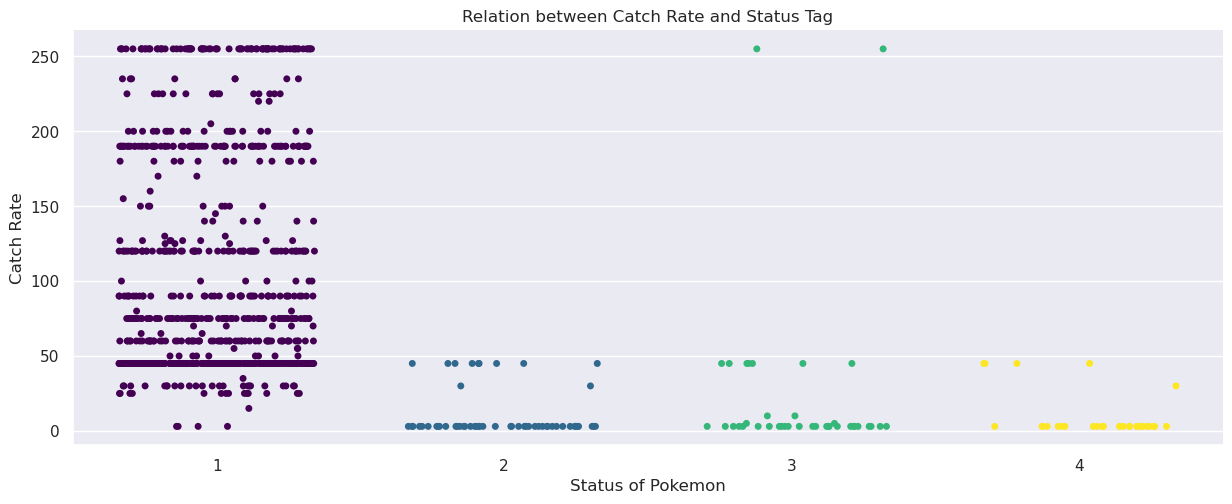

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,base_experience
933,800,Necrozma,7,3,Prism Pokémon,15,0,2.4,270.0
1032,890,Eternatus,8,3,Gigantic Pokémon,14,3,20.0,NaN


In [16]:
# Status - Catch Rate

sns.catplot(data=pokedex,x="status",y="catch_rate",aspect=2.5,hue='status',palette=sns.color_palette("viridis",as_cmap=True),jitter=0.34)
plt.xlabel("Status of Pokemon")
plt.ylabel("Catch Rate")
plt.title("Relation between Catch Rate and Status Tag")
plt.show()

# Encoding Catch Rate:

# We give the missing 'catch_rate' values the symbol '0',
pokedex.loc[:,"catch_rate"].fillna(0,inplace=True)

# The exceptional Legendary Pokemon with high Catch Rate:
pokedex[(pokedex["catch_rate"]>250) & (pokedex["status"]==3)].iloc[:,[0,1,2,3,4,5,6,7,21]]

# Observation: All Pokemon which are Status-2 or higher have less than 50 Catch Rate, barring 2 exceptions.

In [17]:
# The Percentage Male of Pokemon:
print(pokedex["percentage_male"].unique())

# The 'percentage_male' of a Pokemon is completely defined for all Pokemon as a real number from 0 to 100.
# Justification for it might be that any given Pokemon can either be "Male" or "Not Male".
# Based on the above interpretation, there cannot exist any value outside the range [0,100].
# Let us fill in all missing "percentage_male" by 0.
pokedex.loc[:,"percentage_male"].fillna(0,inplace=True)

[ 87.5  50.    0.  100.   25.    nan  75. ]


Text(0.5, 1.0, 'Relation of Egg Cycles with Status of Pokemon')

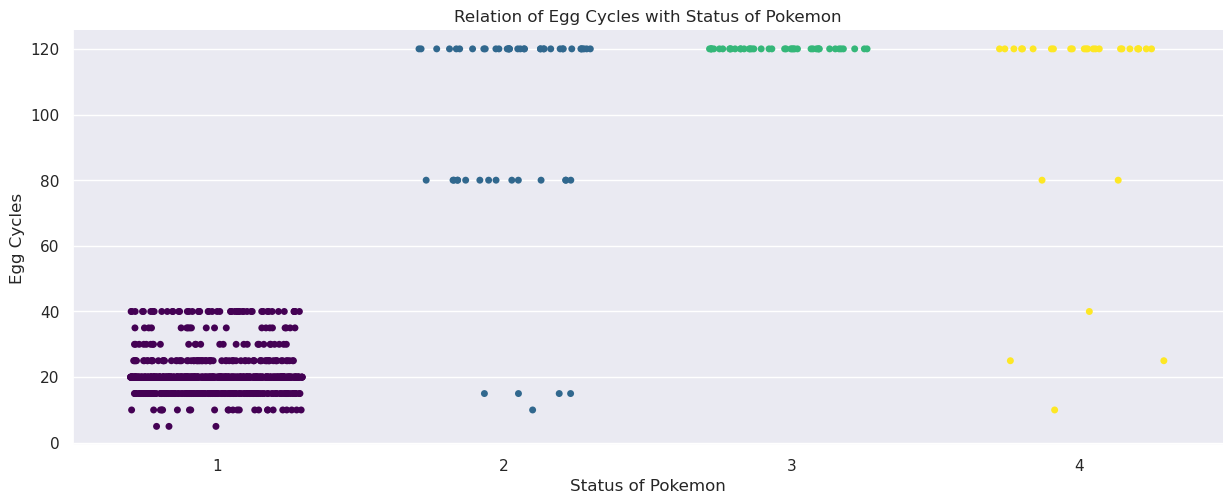

In [18]:
# Egg Cycles - Status

sns.catplot(data=pokedex,x="status",y="egg_cycles",hue="status",palette=sns.color_palette("viridis",as_cmap=True),aspect=2.5,jitter=0.3)
plt.xlabel("Status of Pokemon")
plt.ylabel("Egg Cycles")
plt.title("Relation of Egg Cycles with Status of Pokemon")

In [19]:
# Approximating missing Egg Cycles values:

# From the above plot, there is a clear indication of the relationship of 'egg_cycles' with the 'status' of a Pokemon.
# Hence, let us replace the missing values with the average, for Pokemon of different Status seperately.
egg_cycles_wrt_status = pokedex.groupby("status").apply(lambda df: pd.Series({"Mean":df["egg_cycles"].mean(),"Deviation":df["egg_cycles"].std()}))
print(egg_cycles_wrt_status)

# Now let us replace the missing values with these averages:
pokedex.loc[pokedex["egg_cycles"].isnull(),"egg_cycles"] = pokedex.loc[pokedex["egg_cycles"].isnull()].apply(lambda s: egg_cycles_wrt_status["Mean"][s["status"]],axis="columns")

# An interesting relation is that ALL Status-3(Legendary) Pokemon have the same Egg-cycle value of 120.

              Mean  Deviation
status                       
1        20.965104   6.266540
2        99.454545  32.484651
3       120.000000   0.000000
4       104.666667  33.577839


In [20]:
# Encoding the 'species' values:
species_encoding = pd.Series(0,index=pokedex["species"].unique())
species_encoding.iloc[:] = np.arange(species_encoding.shape[0])

pokedex["species"] = pokedex.loc[:,"species"].apply(lambda v: species_encoding[v])

In [21]:
pokedex.apply(desc_col,axis="index").T.reset_index()

,index,Count,Missing,Unique Count,Data Type,Mean,Deviation,Minimum,Maximum
0,pokedex_number,1045,0,898,int64,440.769378,262.517231,1,898
1,name,1045,0,1045,object,NaN,NaN,NaN,NaN
2,generation,1045,0,8,int64,4.098565,2.272788,1,8
3,status,1045,0,4,int64,1.219139,0.651271,1,4
4,species,1045,0,652,int64,285.697608,198.263458,0,651
5,type_1,1045,0,18,int64,10.407656,5.524097,1,18
6,type_2,1045,0,19,int64,5.041148,5.827109,0,18
7,height_m,1045,0,61,float64,1.374067,3.353349,0.1,100.0
8,weight_kg,1044,1,474,float64,71.216571,132.259911,0.1,999.9
9,ability_1,1045,0,213,int64,137.22201,74.445257,0,265


##### Exploratory Analysis of the Data:

Text(0.5, 1.0, 'Total Distribution of Pokemon Types')

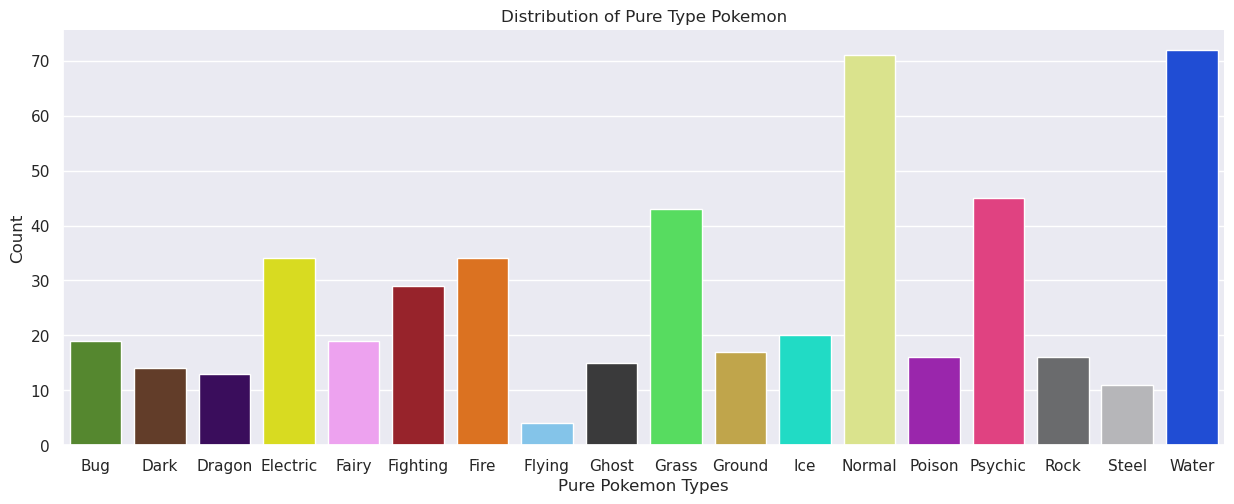

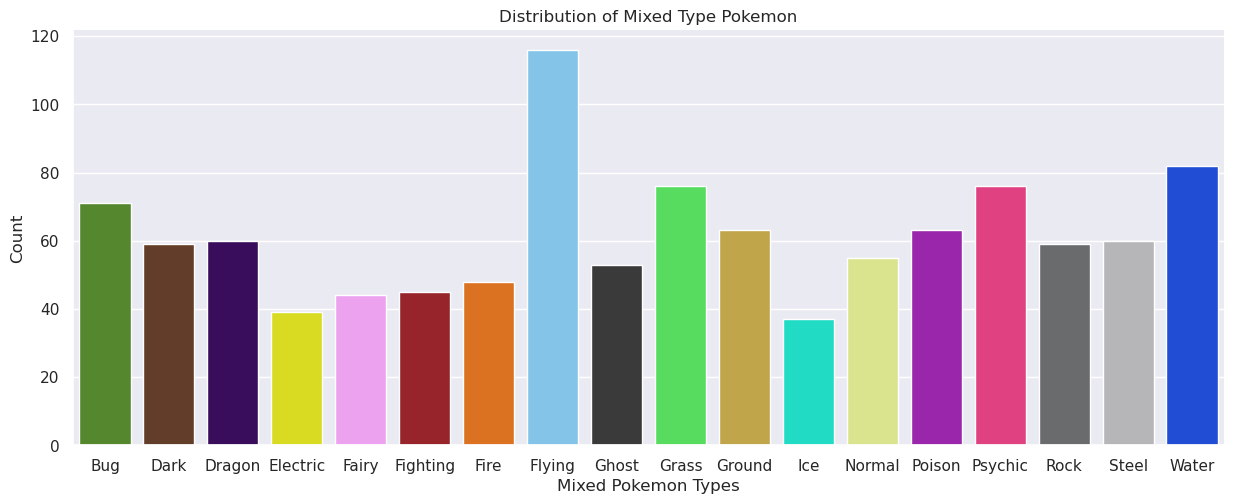

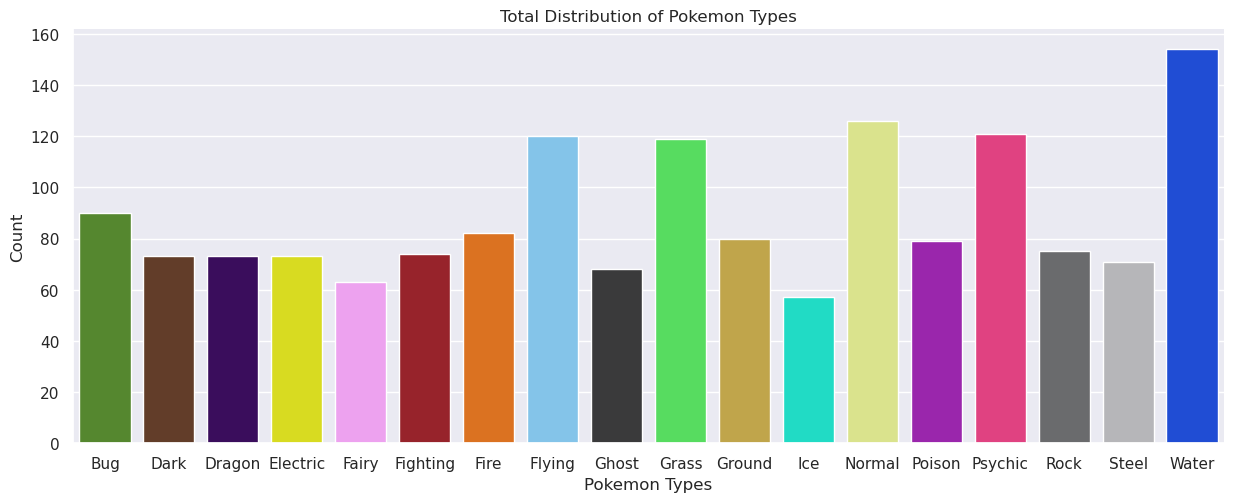

In [22]:
# Distribution of Pokemon among various Types:

type_colors = pd.Series(["#ffffff","#539620","#6b3a20","#3c0069","#f6fa02","#f995fc","#ab0f1a","#fa6e02",
                         "#73c8fa","#3a3a3b","#41f24d","#d4af37","#02fadd","#e5f27e","#aa10c2",
                         "#fa287c","#696b6e","#b5b6ba","#023ef2"],index=type_encoding.index)


pure_type_count = (pokedex[pokedex["type_2"]==0].groupby("type_1").apply(lambda df: df.shape[0])).rename(lambda x: type_encoding.index[x]).reset_index()
pure_type_count.rename(columns={"type_1":"Type",0:"Count"},inplace=True)

sns.catplot(data=pure_type_count,x="Type",y="Count",kind="bar",aspect=2.5,palette=type_colors.array[1:])
plt.xlabel("Pure Pokemon Types")
plt.ylabel("Count")
plt.title("Distribution of Pure Type Pokemon")


mix_type_count = (pokedex[pokedex["type_2"]!=0].groupby("type_2").apply(lambda df: df.shape[0]) + 
                  pokedex[pokedex["type_2"]!=0].groupby("type_1").apply(lambda df: df.shape[0])).rename(lambda x: type_encoding.index[x]).reset_index()


mix_type_count.rename(columns={"type_2":"Type",0:"Count"},inplace=True)

sns.catplot(data=mix_type_count,x="Type",y="Count",kind="bar",aspect=2.5,palette=type_colors.array[1:])
plt.xlabel("Mixed Pokemon Types")
plt.ylabel("Count")
plt.title("Distribution of Mixed Type Pokemon")

total_count = (pure_type_count["Count"] + mix_type_count["Count"]).rename(lambda x: type_encoding.index[x+1]).reset_index()
total_count.rename(columns={"index":"Type"},inplace=True)

sns.catplot(data=total_count,x="Type",y="Count",kind="bar",aspect=2.5,palette=type_colors.array[1:])
plt.xlabel("Pokemon Types")
plt.ylabel("Count")
plt.title("Total Distribution of Pokemon Types")

In [23]:
# Conclusions on Type Distributions:

# Among Pure Types, the most common is the Water-type and a close next comes the Normal-Type. The least frequent is the Flying-type.

# Among Mixed the most common is the Flying-type, far outnumbering any other Type. The least frequent is the Ice-type.

# In all, the most frequent type is the Water-type and the least frequent type is the Ice-type.

In [24]:
# Pokemon Battle Stats columns:

bt_sts = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

# The properties 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed' 
# are very familiar to anyone that has ever played a Pokemon game.

# These *positive integer* values are some of the key descriptions of a Pokemon in Battles:
# 'hp' or Health Points keeps a Pokemon fighting, and when it hits 0 a Pokemon "faints" and loses.
# 'attack' and 'sp_attack' determine the damage that a Pokemon's moves inflict.
# 'defense' and 'sp_defense' determine the damage that is dealt to the Pokemon upon being hit by a move.
# 'speed' determines the move-order of Pokemon in battle. The faster Pokemon attack first.

# 'total_points' is a simple aggregate of all the individual properties mentioned above. Let's verify this:
print("Does any exception exist:",(pokedex["total_points"] != (pokedex.loc[:,bt_sts[1:]].apply(lambda s: s.sum(),axis="columns"))).any())


Does any exception exist: False


In [25]:
# Distribution of parameter values among different types:
# For Pokemon of each Type(in either 1 or 2), let us examine the distribution of the various parameters.

# We can define an "average" Pokemon to form a Baseline for comparison:

# The overall "average" attribute Pokemon : (From previous summary table) 
# total_points: 439.35311
# hp: 70.067943
# attack: 80.476555
# defense: 74.670813
# sp_attack: 73.031579
# sp_defense: 72.298565
# speed: 68.807656

# Moreover, let us also form seperately form the "average" Pokemon of each Type:
avg_poke_stats = pd.DataFrame(0,index=type_encoding.index,columns=bt_sts[1:])
avg_poke_stats.loc["Null",bt_sts[1:]] = pokedex[bt_sts[1:]].apply(lambda s: s.mean(),axis="index")



def plot_stat(pokedex,table,stat,type_colors):
    fig , axes = plt.subplots(4,5,figsize=(25,15))
    axes[3,3].remove()
    axes[3,4].remove()
    for t in range(1,19):
        data = pokedex[(pokedex["type_1"]==t) | (pokedex["type_2"]==t)]
        table.loc[(table.index[t]),stat] = data.loc[:,stat].mean()
        axes[(t-1)//5,(t-1)%5].set_xlim(0,260)
        sns.histplot(data=data,x=stat,color=type_colors[t],ax=axes[(t-1)//5,(t-1)%5],alpha=0.7,binwidth=10)
        axes[(t-1)//5,(t-1)%5].set(xlabel=None,ylabel=None)
    fig.tight_layout()
    plt.show()

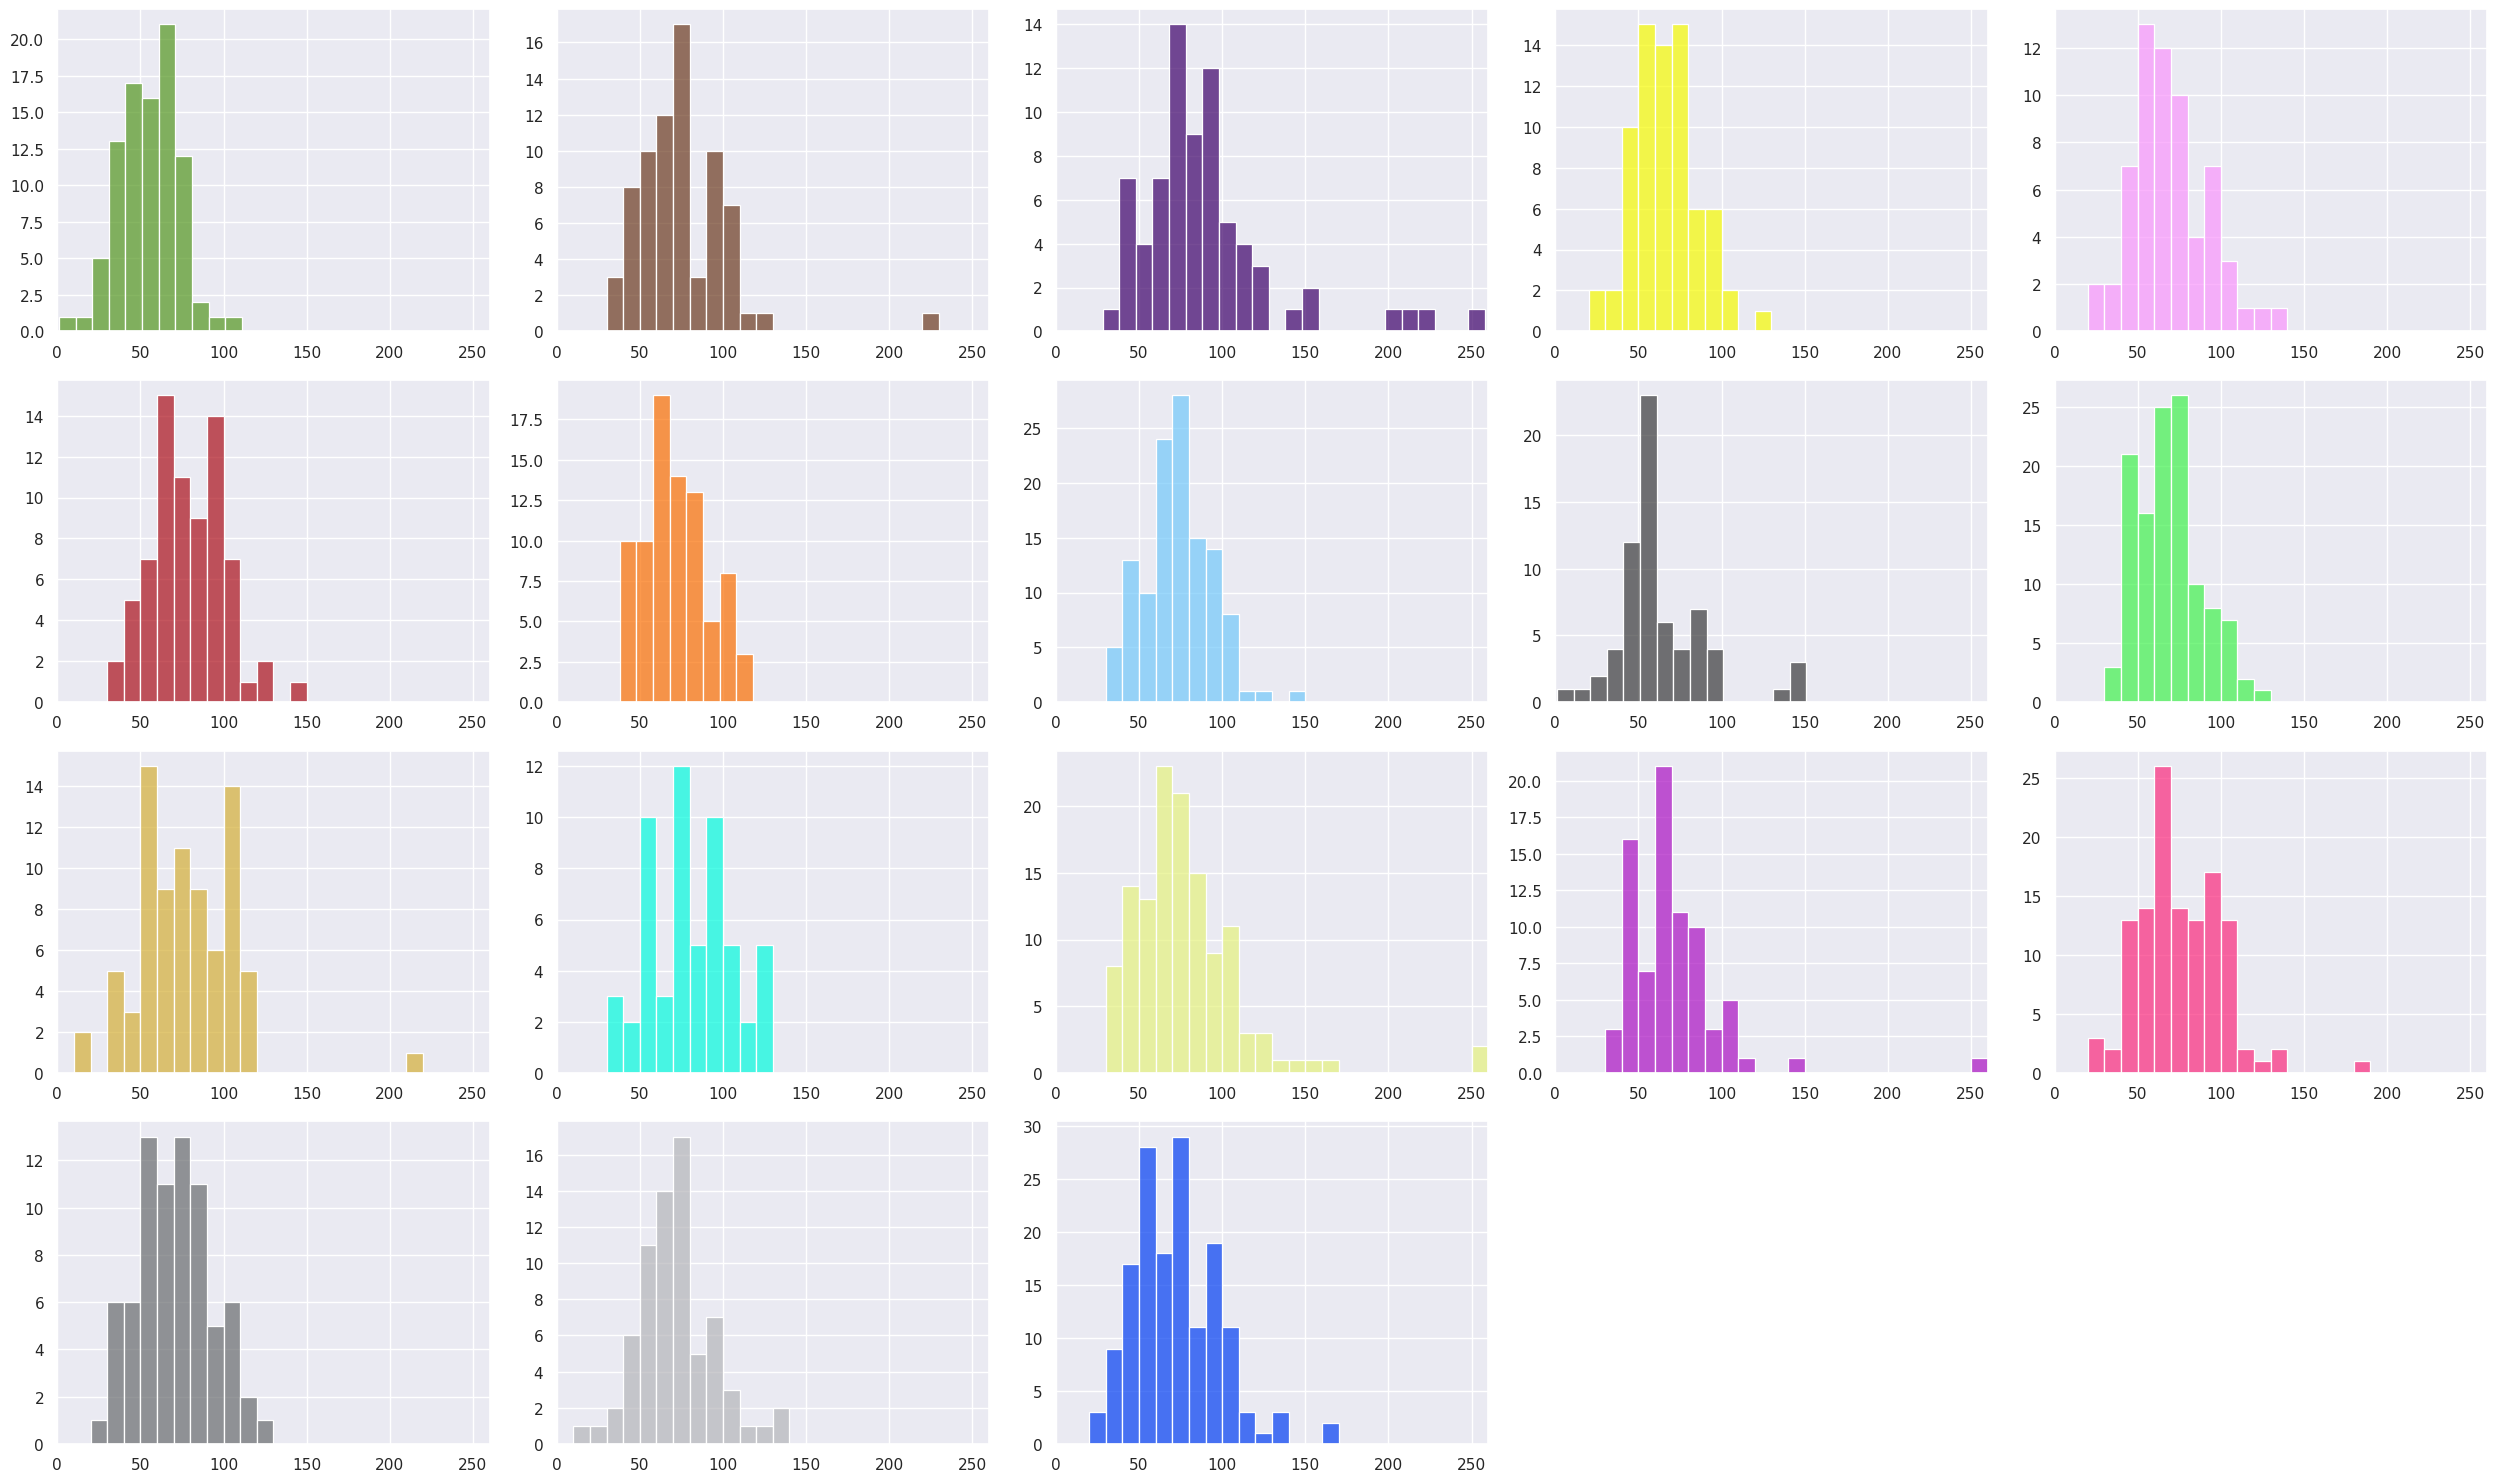

In [26]:
plot_stat(pokedex,avg_poke_stats,"hp",type_colors) # Health Points

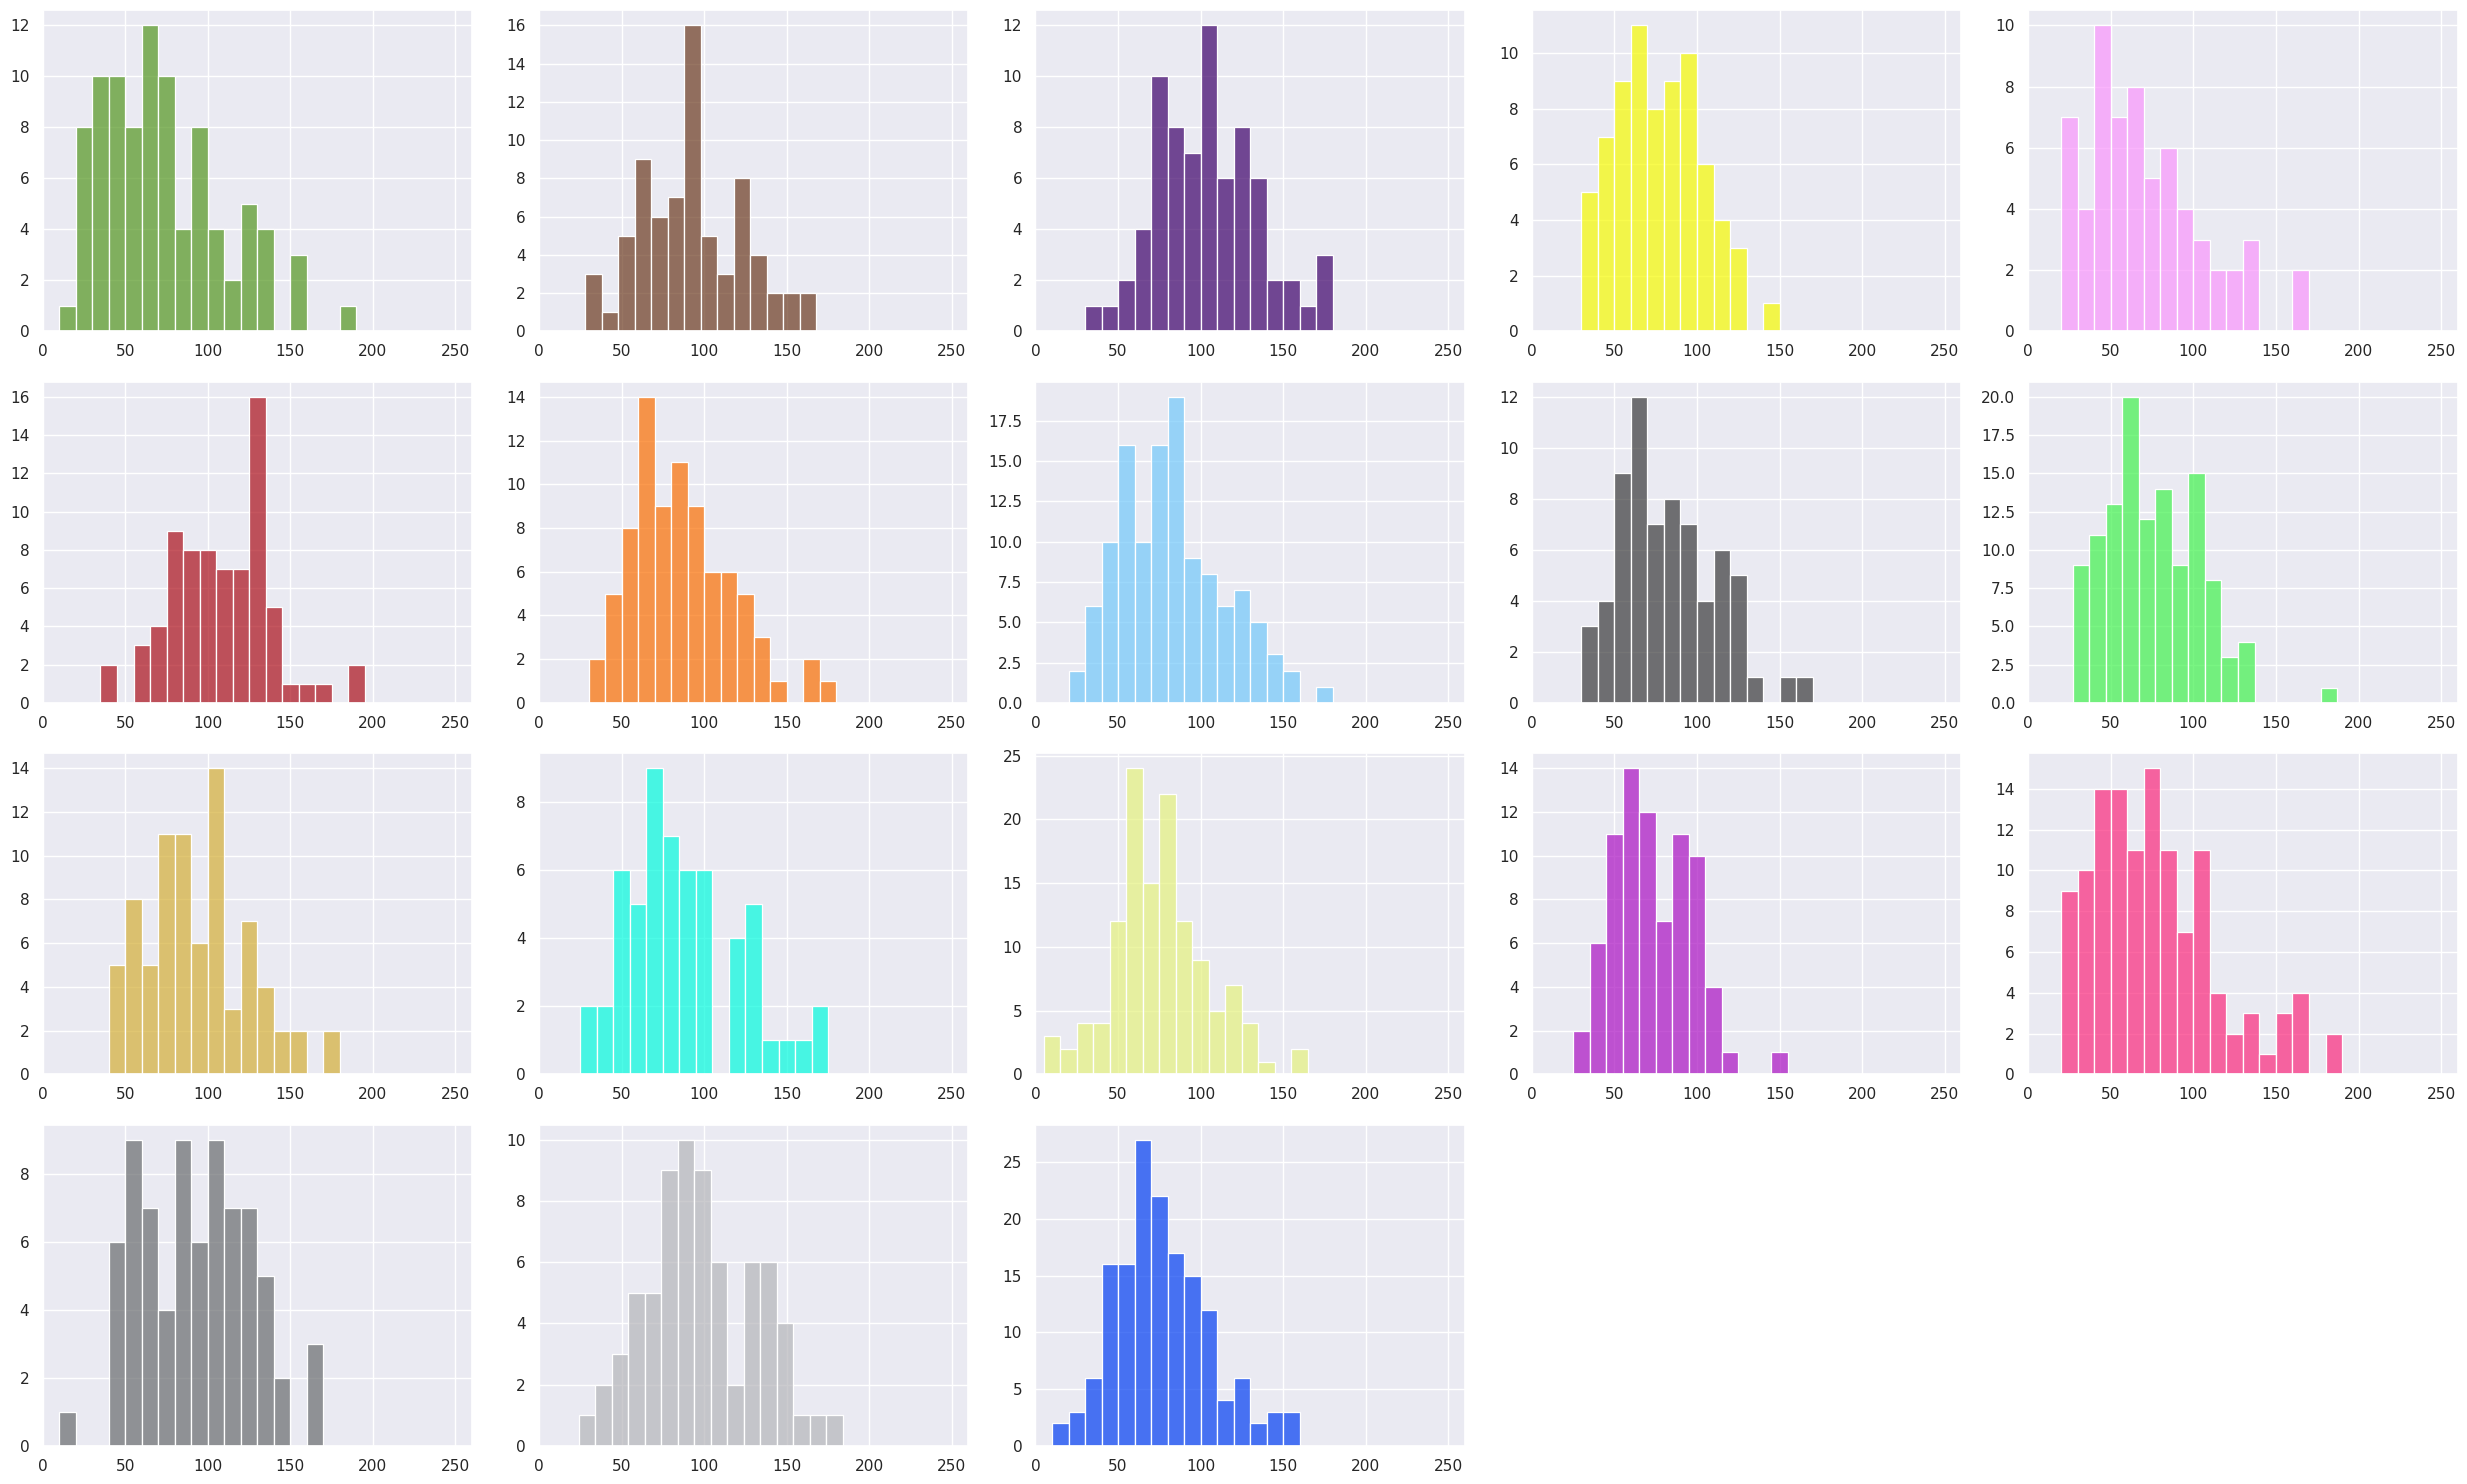

In [27]:
plot_stat(pokedex,avg_poke_stats,"attack",type_colors) # Attack

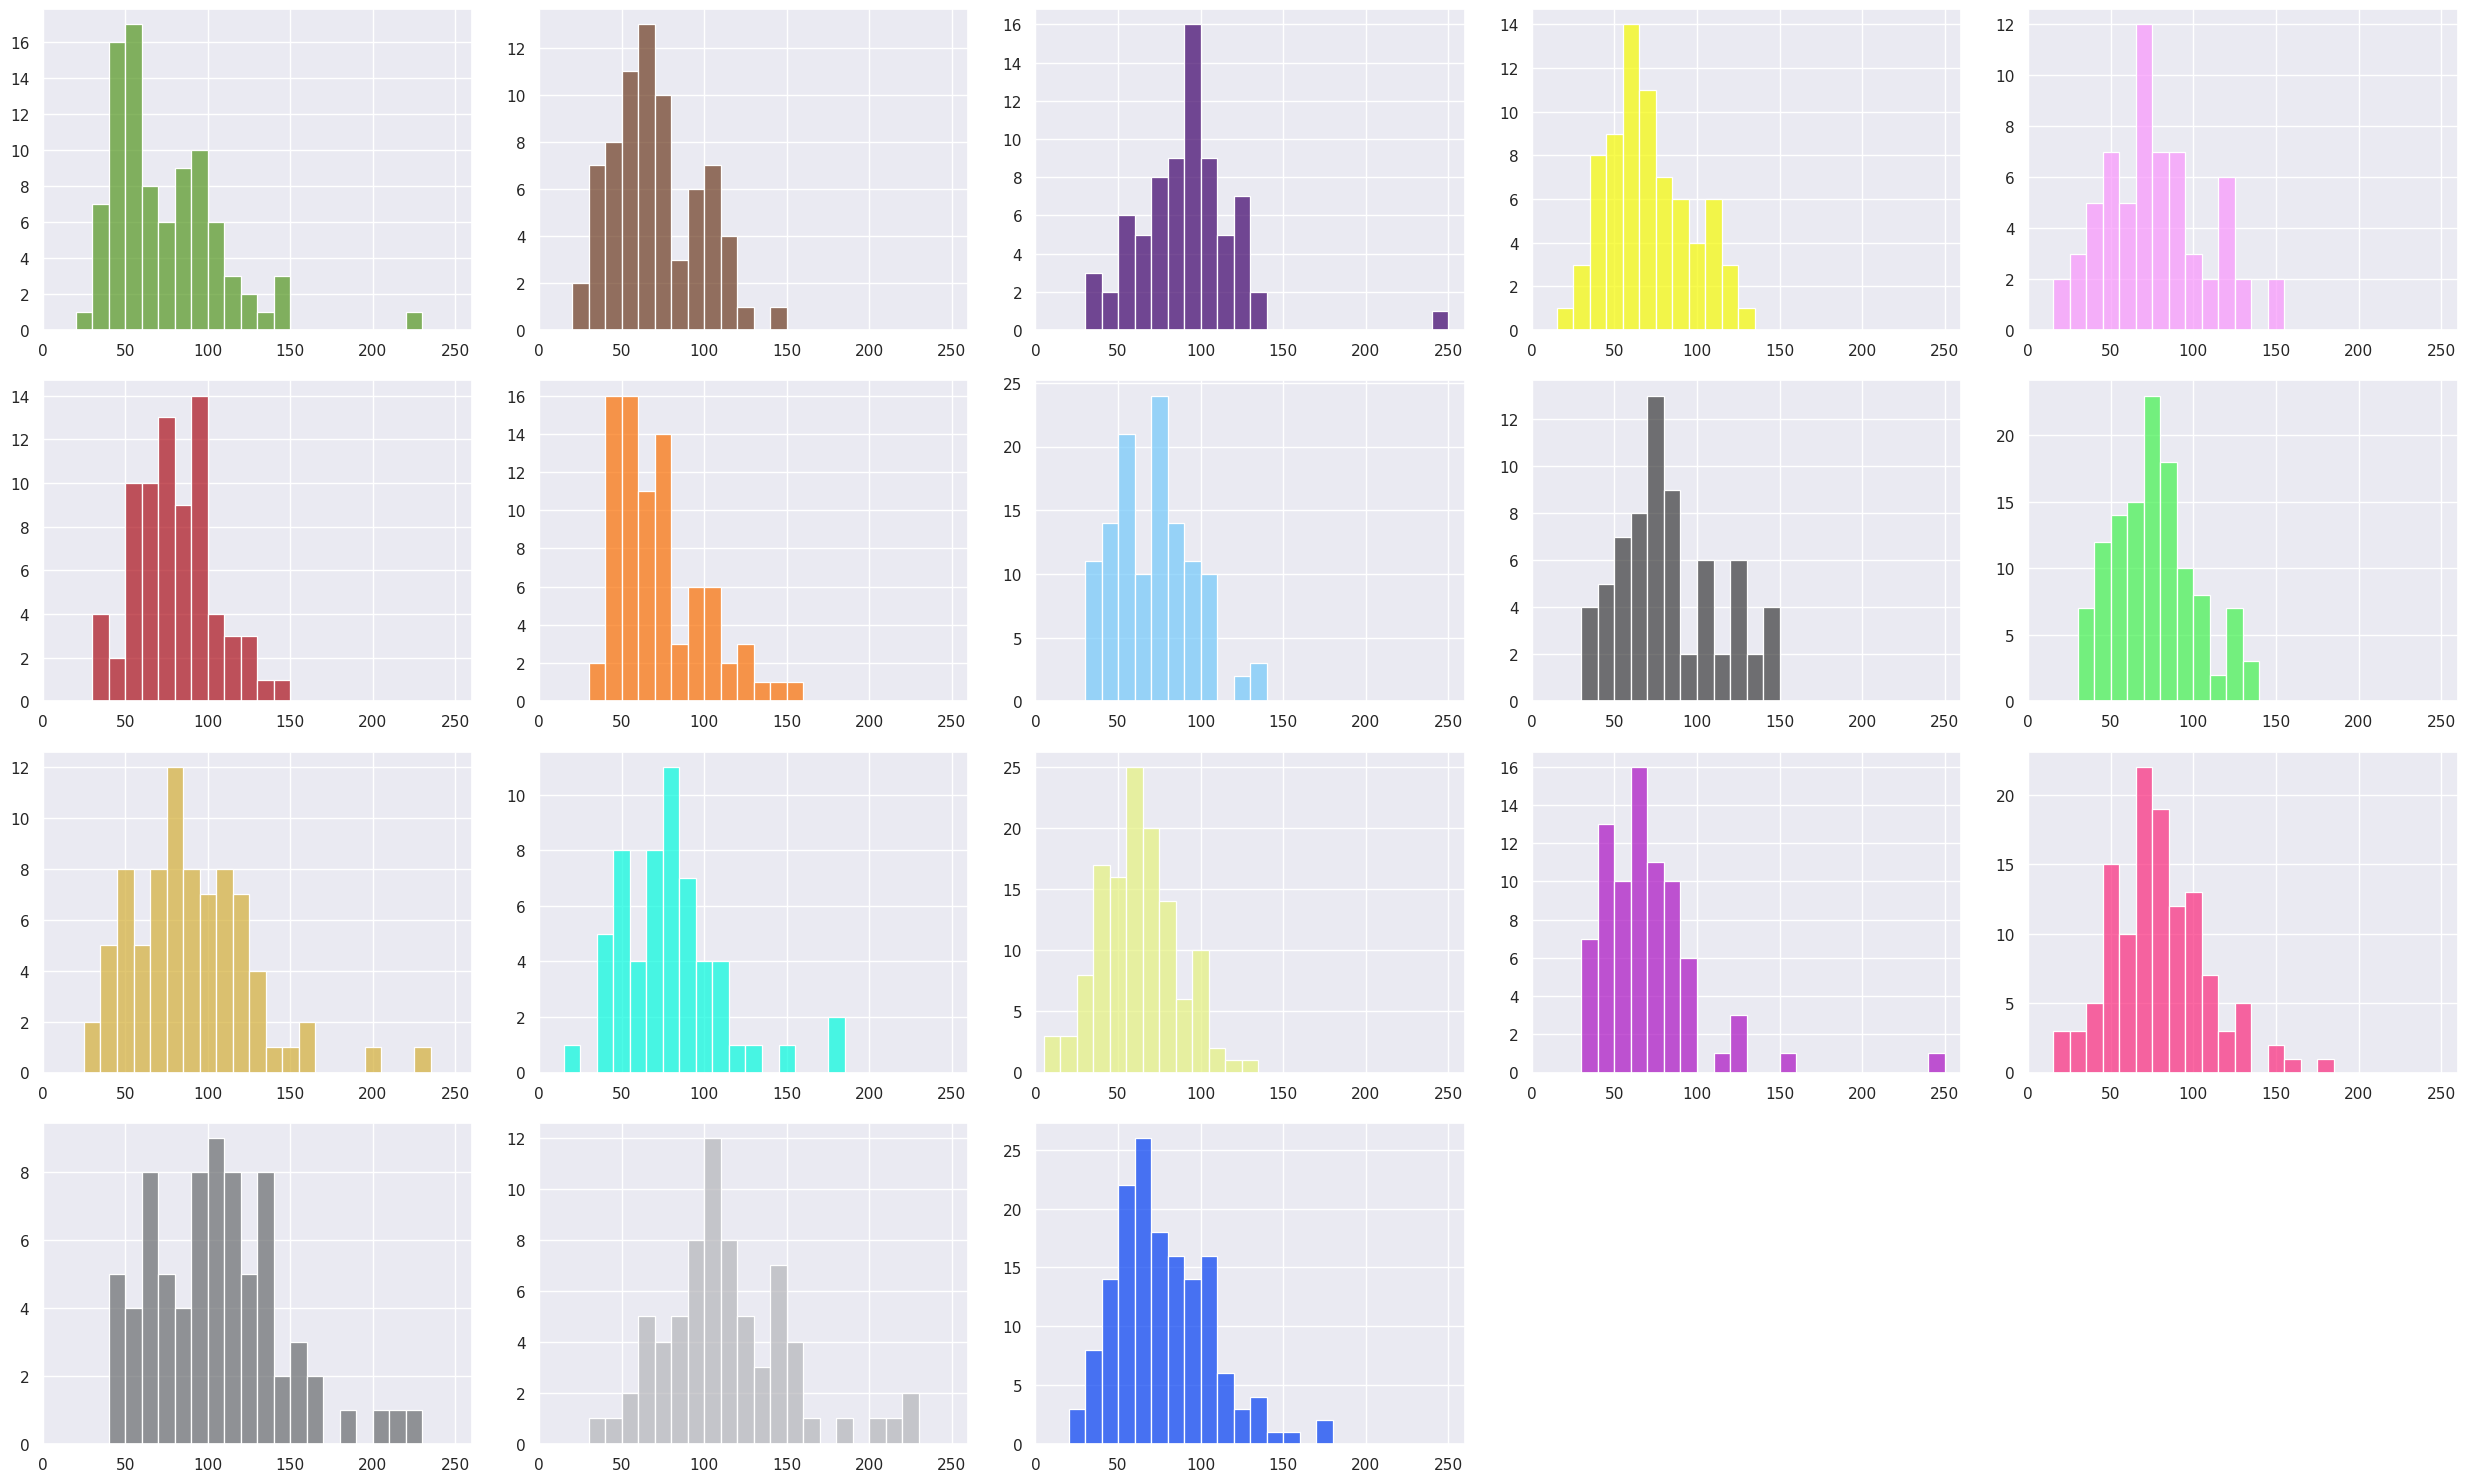

In [28]:
plot_stat(pokedex,avg_poke_stats,"defense",type_colors) # Defense

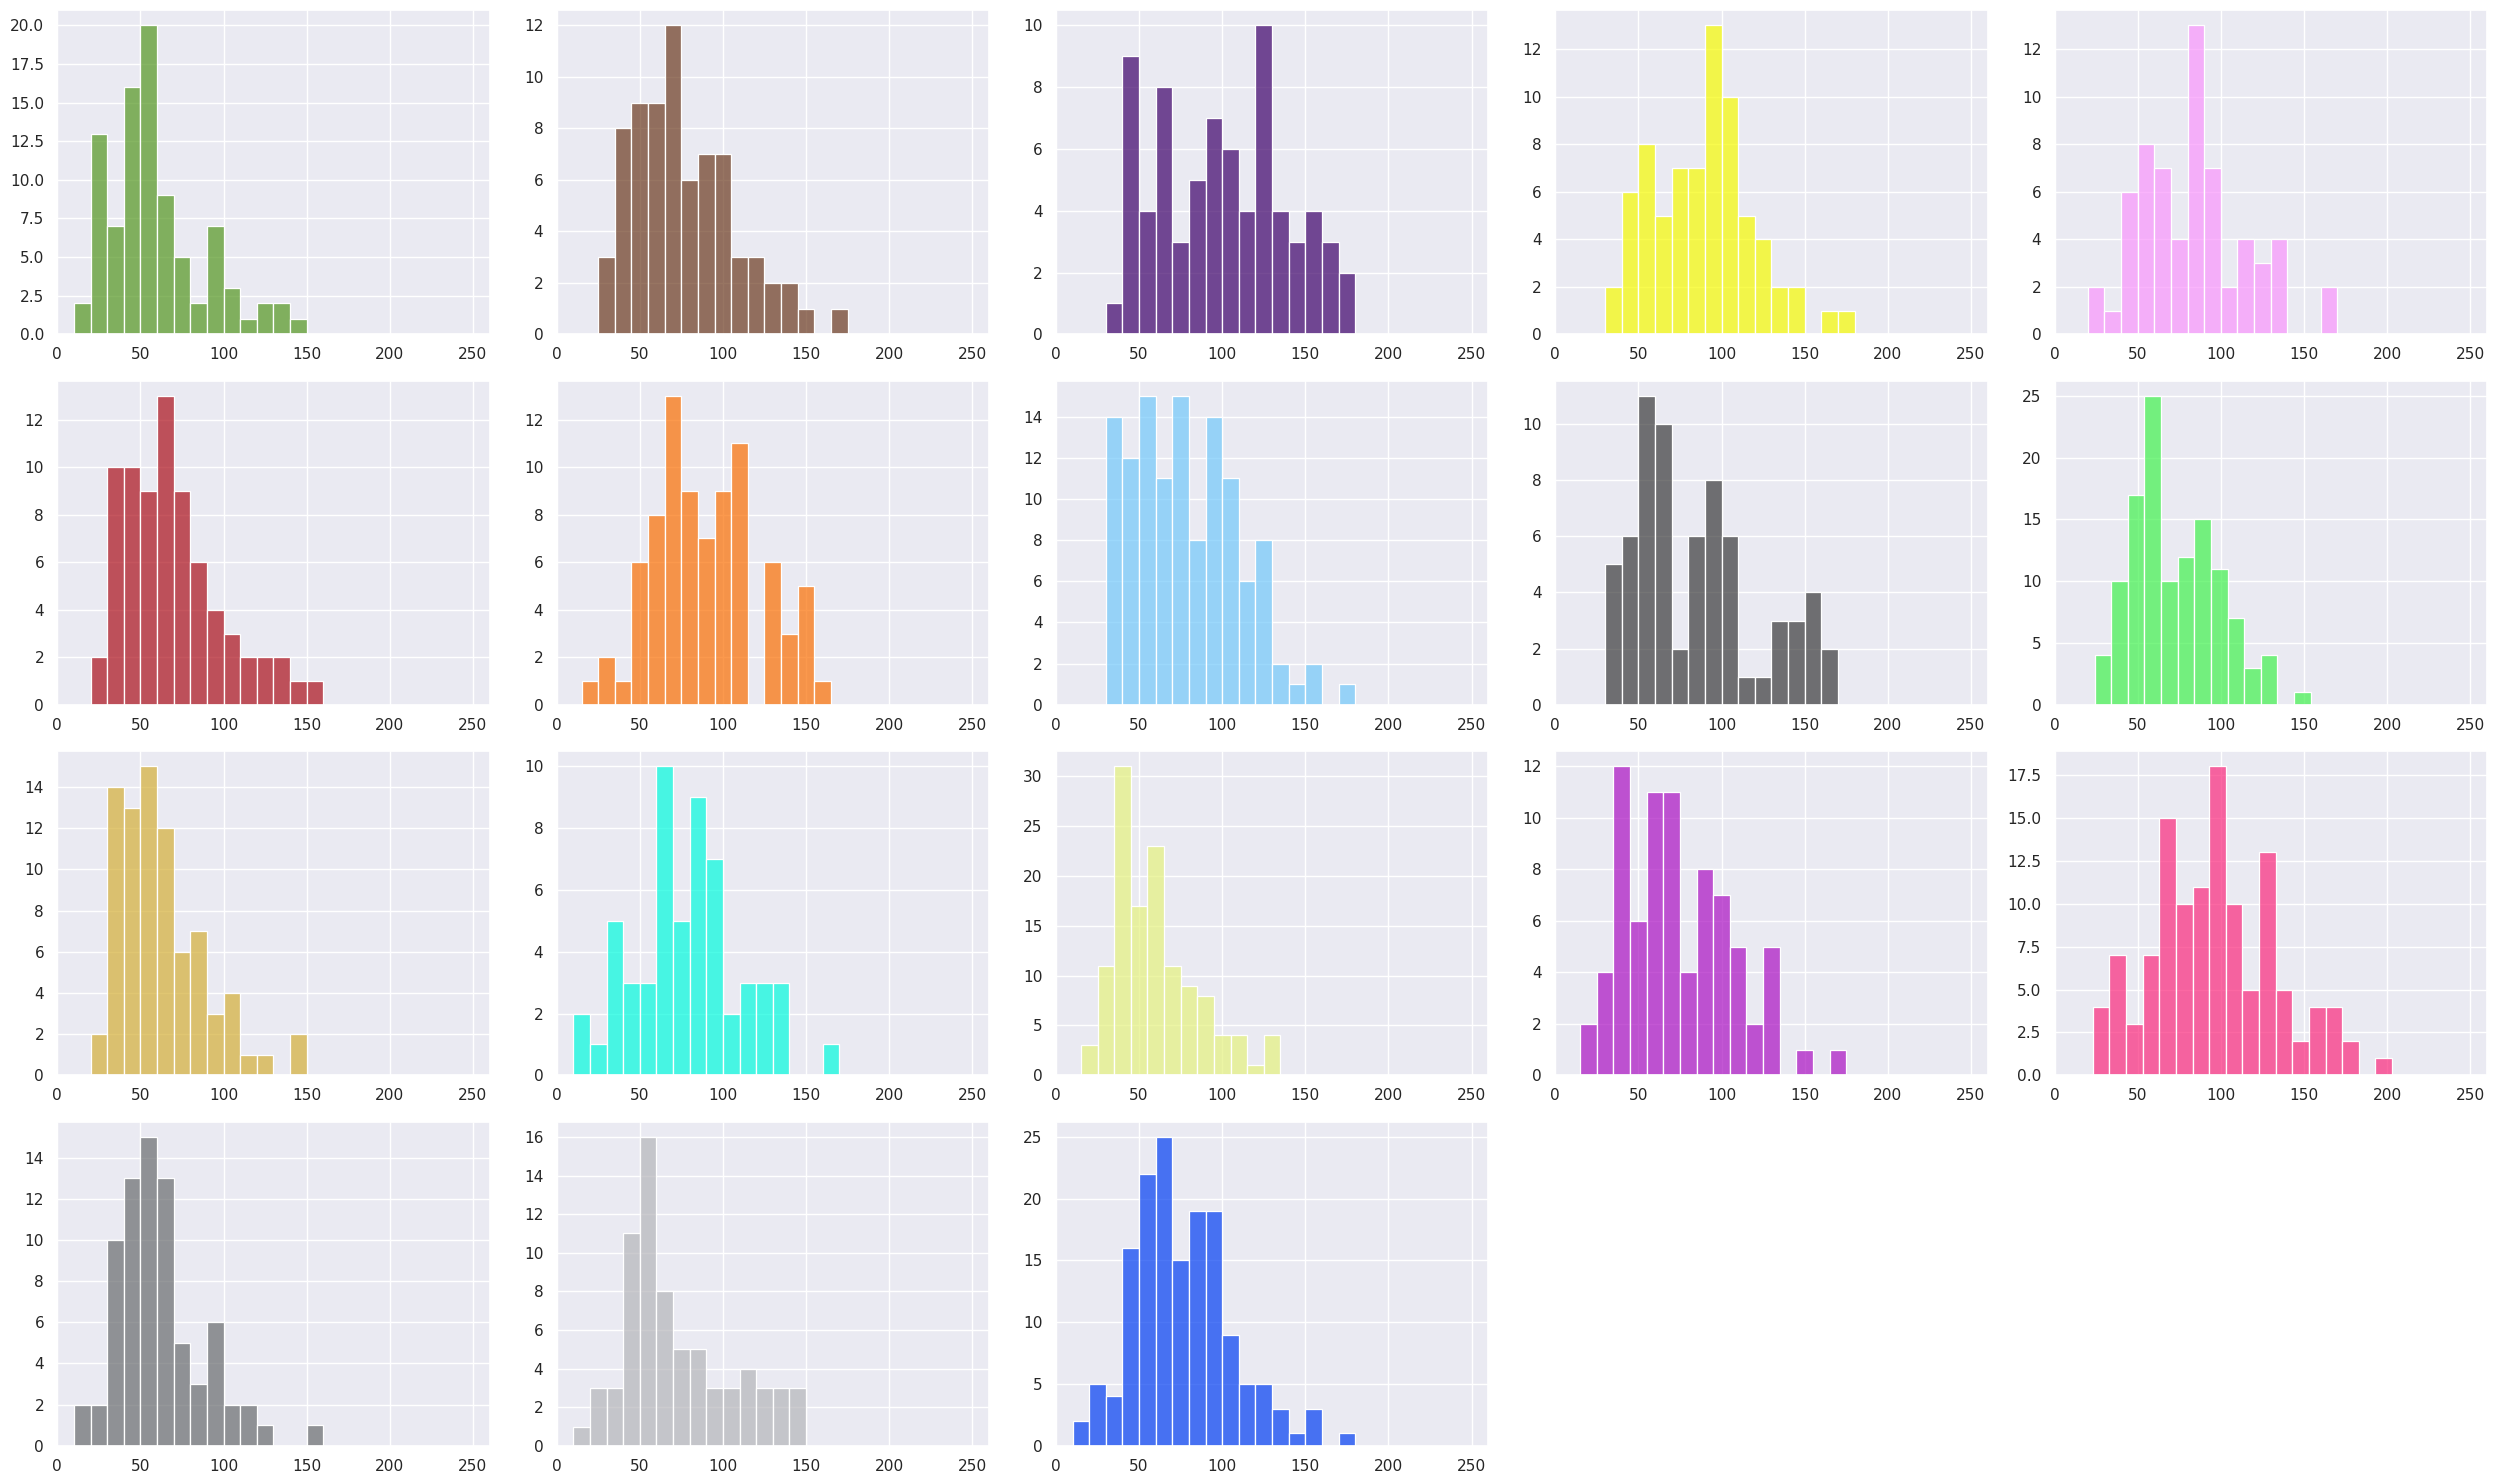

In [29]:
plot_stat(pokedex,avg_poke_stats,"sp_attack",type_colors) # Special Attack

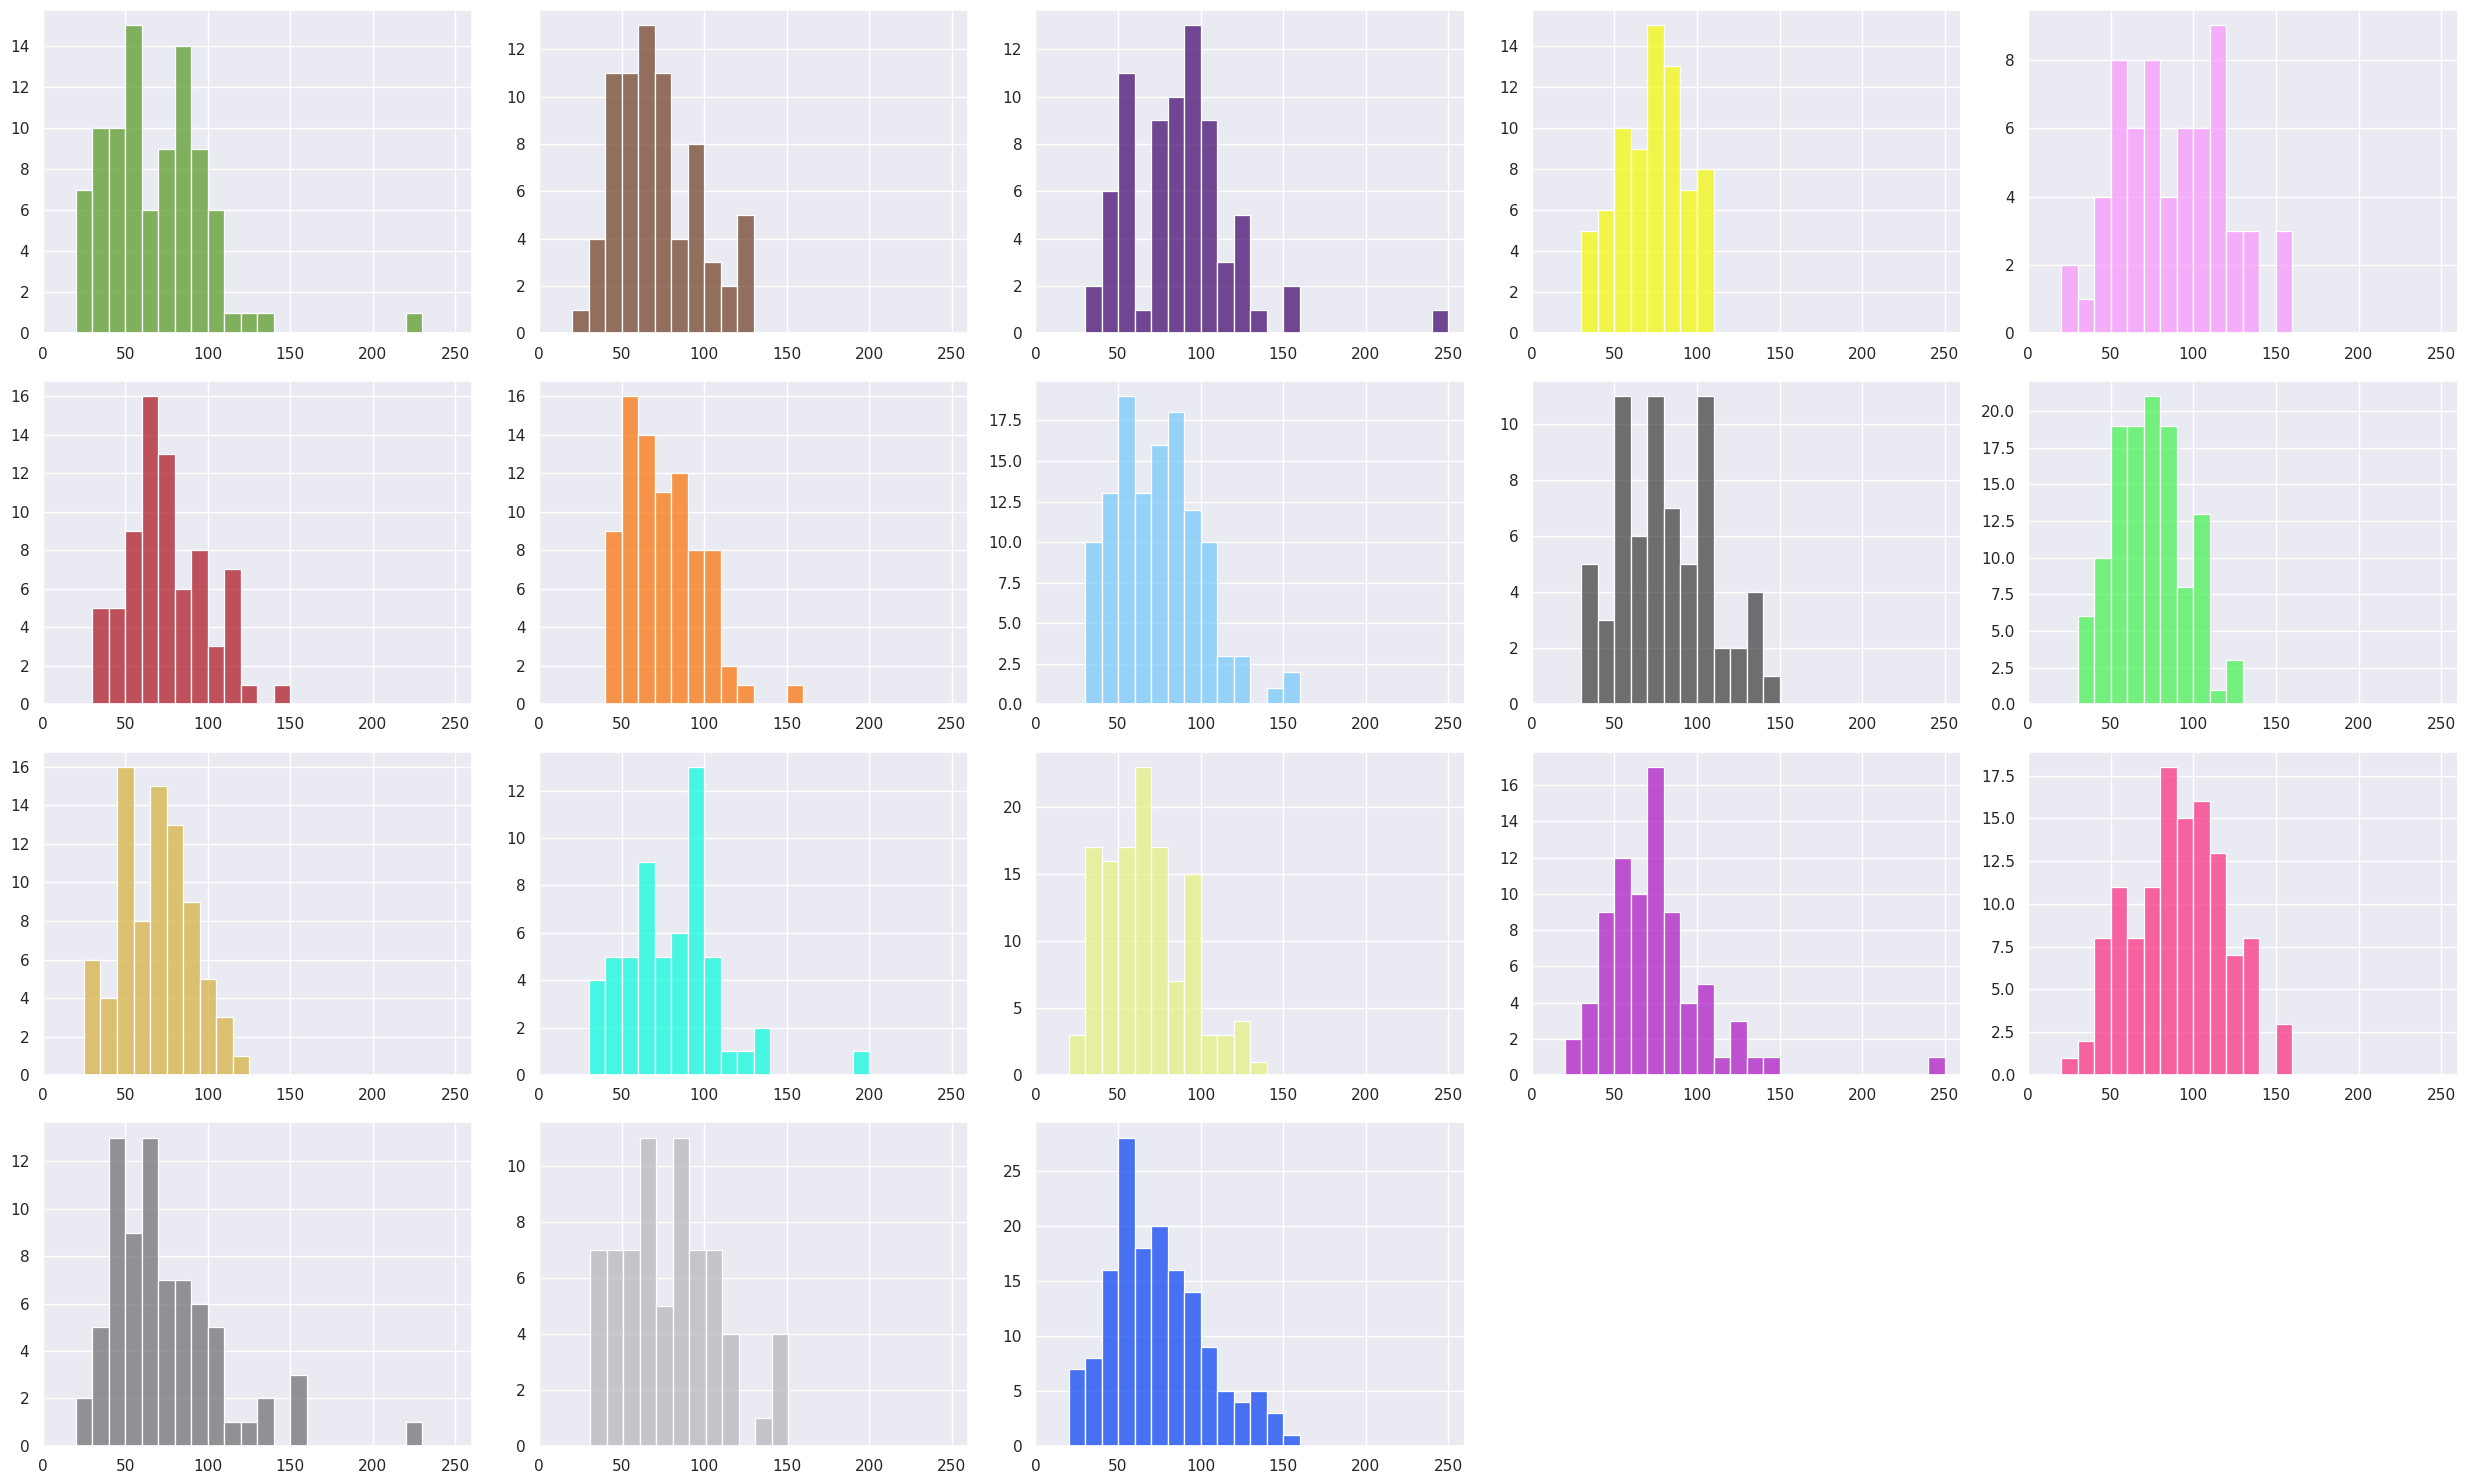

In [30]:
plot_stat(pokedex,avg_poke_stats,"sp_defense",type_colors) # Special Defense

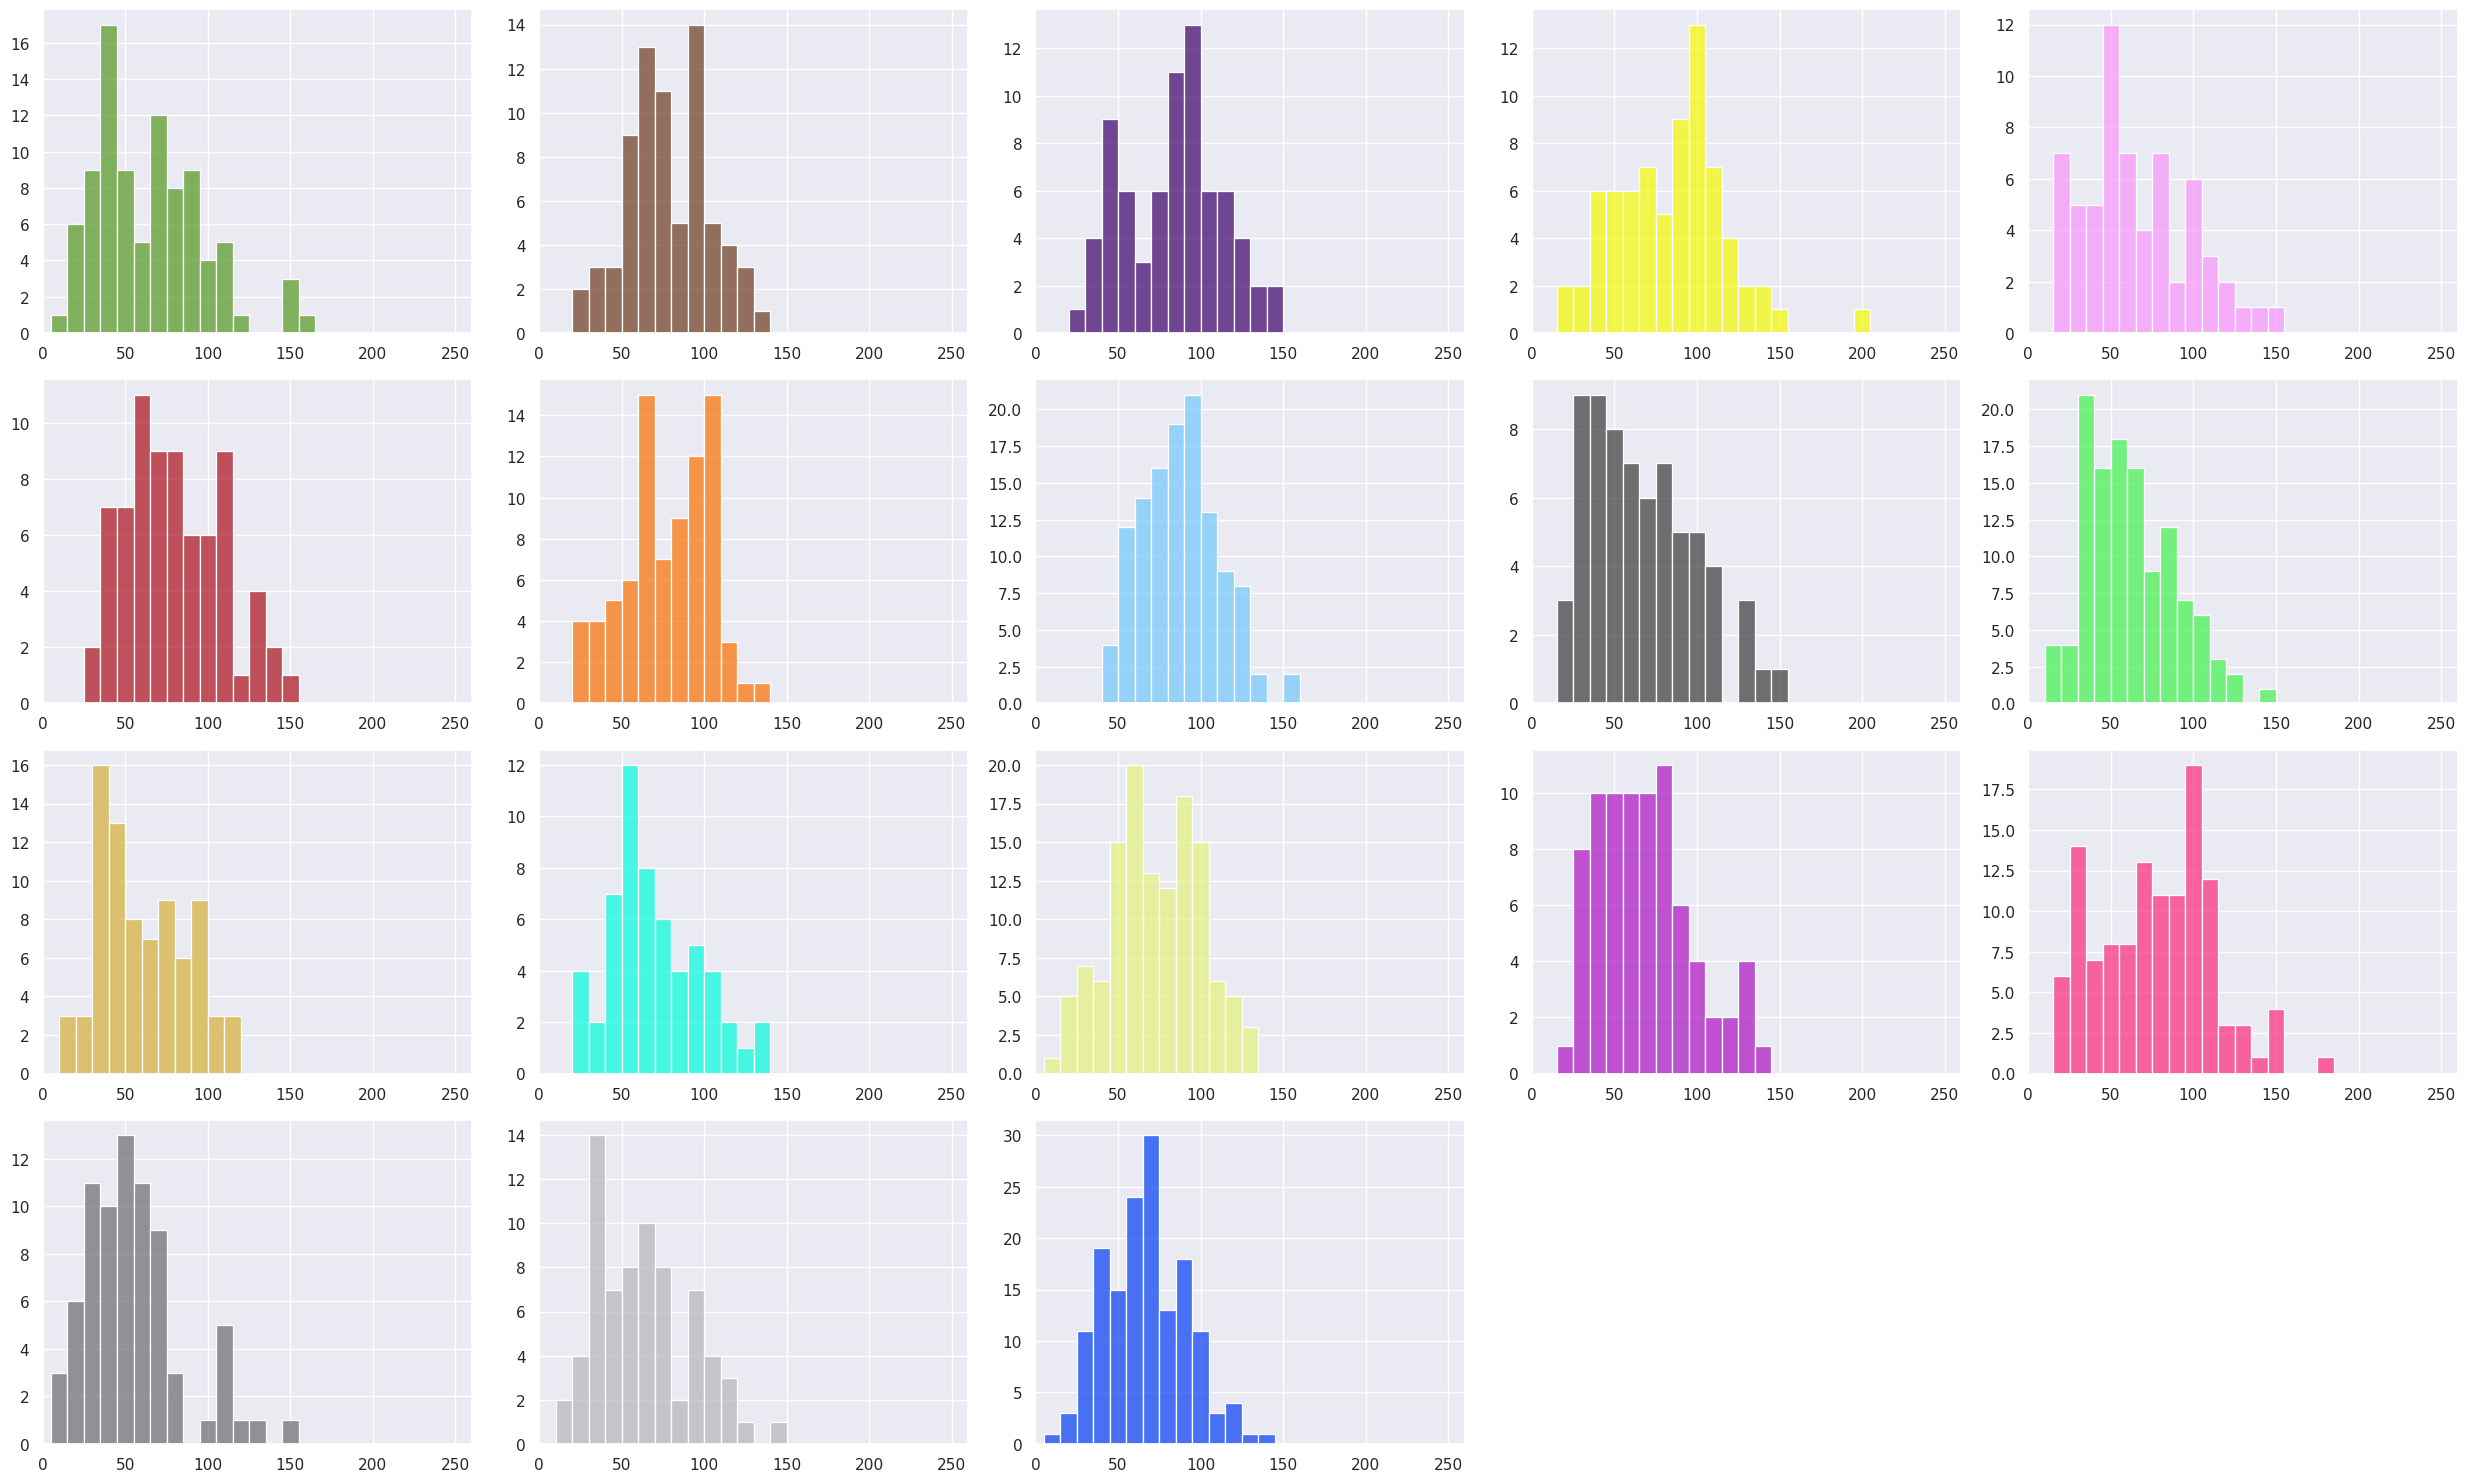

In [31]:
plot_stat(pokedex,avg_poke_stats,"speed",type_colors) # Speed

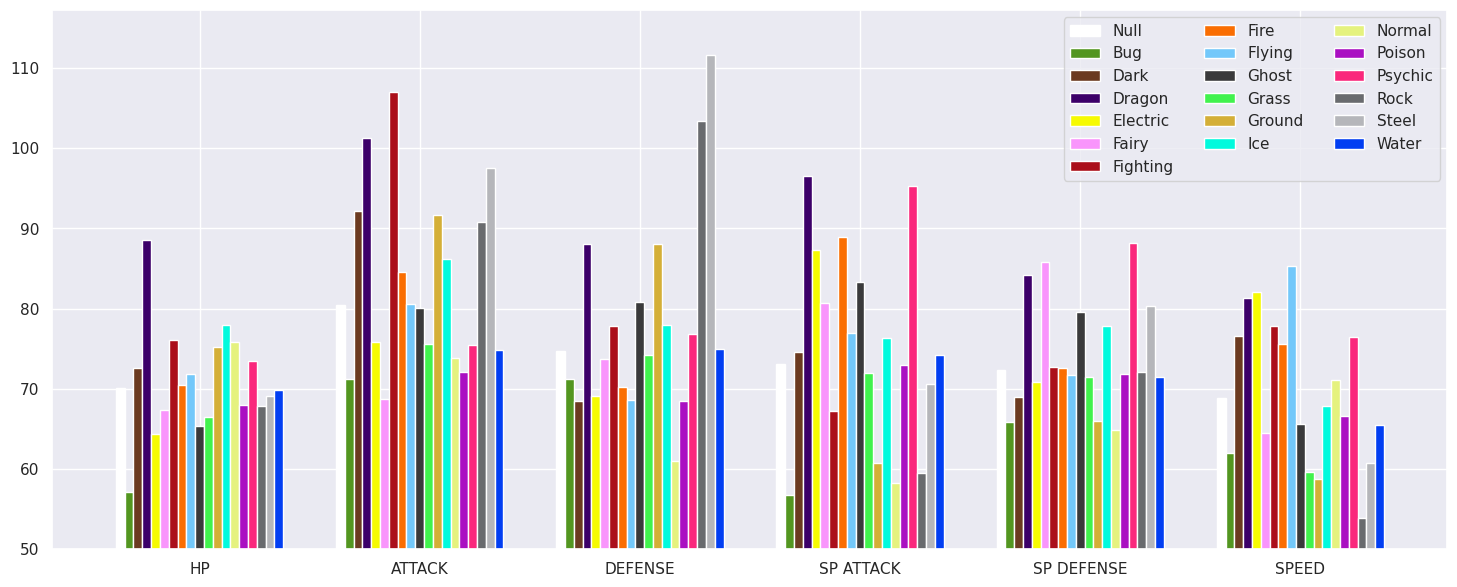

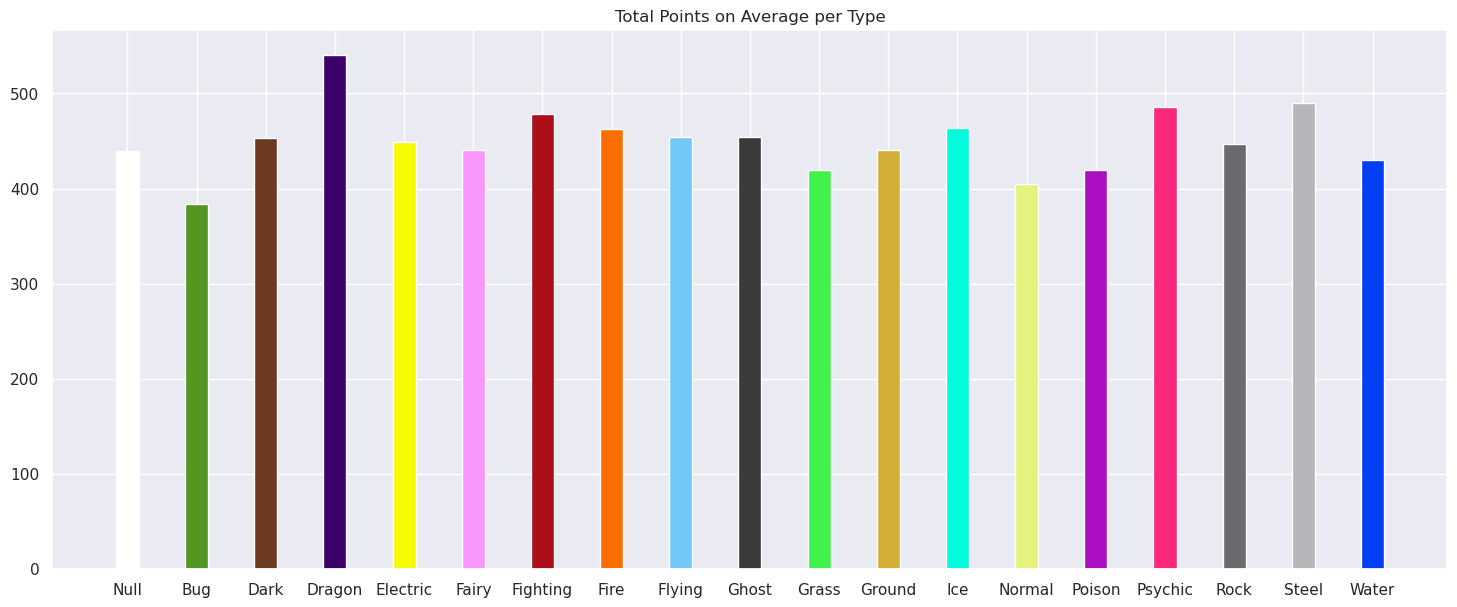

In [32]:
# Comparing the average Pokemon of each Type:
avg_poke_stats.rename(lambda s: ' '.join(str.split(s,sep='_')).upper(),axis="columns",inplace=True)

x = np.arange(6)  # The number of x-axis labels
width = 0.04  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18,7))

for ind in range(19):
    offset = width * multiplier
    rects = ax.bar(x + offset, avg_poke_stats.iloc[ind], width, label=avg_poke_stats.index[ind],color=type_colors.iloc[ind])
    multiplier += 1
ax.set_xticks(x + width*9, avg_poke_stats.columns)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(50)
plt.show()

fig,axis = plt.subplots(figsize=(18,7))
axis.bar(range(6,19*6+1,6),avg_poke_stats.apply(lambda s: s.sum(),axis="columns").array,2,color=type_colors)
axis.set_xticks(range(6,19*6+1,6), avg_poke_stats.index)
plt.title("Total Points on Average per Type")
plt.show()


In [33]:
# Conclusions on columns of Battle Statistics:

# When considering the average values of the properties grouped by Type, we observe:

# Dragon-Types have the highest HP.
# Fighting-Types have the highest Attack.
# Steel-Types and Rock-Types have the highest Defense.
# Dragon-Types and Psychic-Types have the highest Special Attack.
# Psychic-Types followed by Fairy-Types and Dragon-Types have the highest Special Defense.
# Flying-Types followed by Electric-Types and Dragon-Types have the highest Speed.

# On average, Dragon-Types have the highest cumulative Total Points, while the lowest is of Bug-Types.

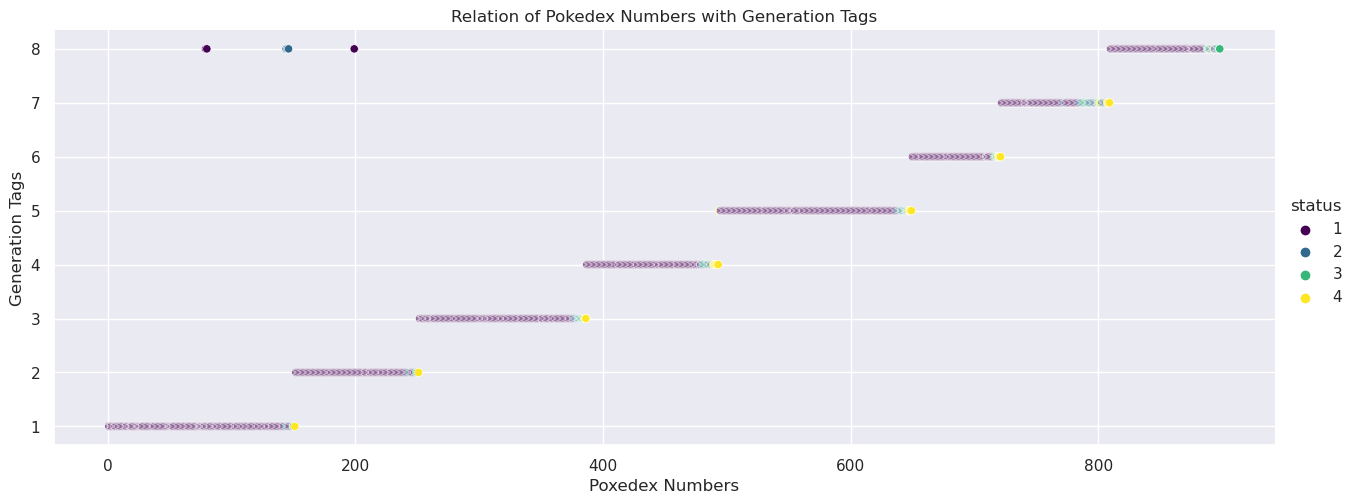

,pokedex_number,name,generation,status,species,type_1,type_2
104,79,Galarian Slowpoke,8,1,44,15,0
107,80,Galarian Slowbro,8,1,45,14,15
185,144,Galarian Articuno,8,2,95,15,8
187,145,Galarian Zapdos,8,2,96,6,8
189,146,Galarian Moltres,8,2,97,2,8
246,199,Galarian Slowking,8,1,130,14,15


In [34]:
# Pokedex Number - Generation

sns.relplot(data=pokedex,x="pokedex_number",y="generation",hue="status",palette=sns.color_palette("viridis",as_cmap=True),height=5,aspect=2.6)
plt.xlabel("Poxedex Numbers")
plt.ylabel("Generation Tags")
plt.title("Relation of Pokedex Numbers with Generation Tags")
plt.show()

# Exceptional Pokemon from Generation 8:
pokedex[(pokedex["generation"]==8) & (pokedex["pokedex_number"]<200)].loc[:,['pokedex_number','name','generation','status','species','type_1','type_2']]

# Observations:

# Barring the exceptional Pokemon(all of which have the same prefix value 2), the Generation and Pokedex Number 
# seem to share a "step-functional" relationship.

# Moreover, looking at the Distribution of Status, we observe, in each Generation, the Pokedex numbers are ordered 
# in increasing manner of Status tag.

# The only generation without any Status-4 Pokemon: Generation 8.

Text(0.5, 1.0, 'Relation between Base Friendship and Status Tag')

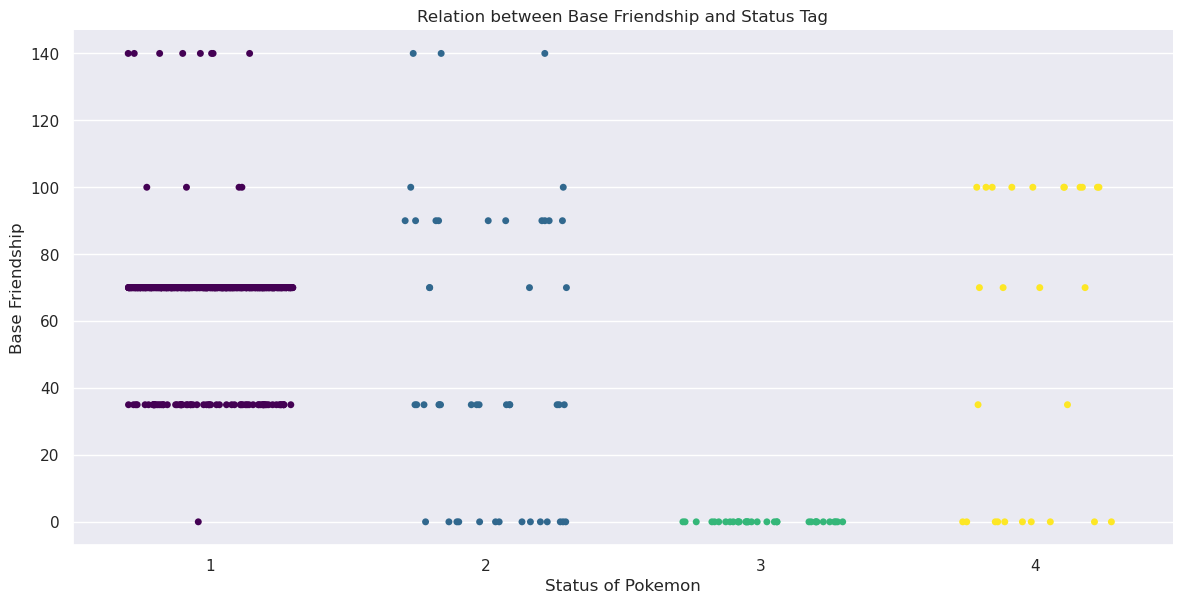

In [35]:
# Base Friendship - Status

sns.catplot(data=pokedex,x="status",y="base_friendship",hue="status",palette=sns.color_palette("viridis",as_cmap=True),height=6,aspect=2,jitter=.3)
plt.xlabel("Status of Pokemon")
plt.ylabel("Base Friendship")
plt.title("Relation between Base Friendship and Status Tag")

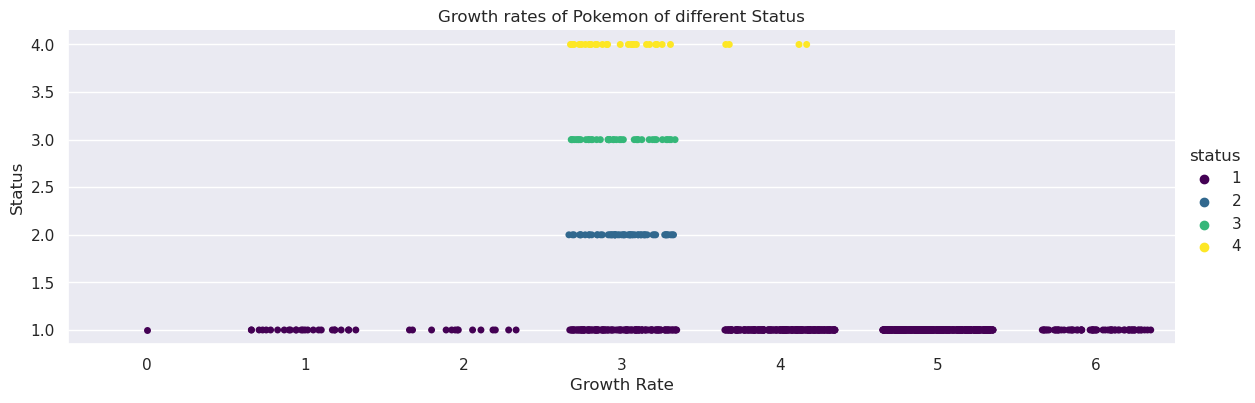

,pokedex_number,name,generation,status,species,type_1,type_2,growth_rate
196,151,Mew,1,4,99,15,0,4
304,251,Celebi,2,4,168,15,10,4
588,492,Shaymin Land Forme,4,4,359,10,0,4
589,492,Shaymin Sky Forme,4,4,359,10,8,4
658,555,Galarian Darmanitan Zen Mode,5,1,407,12,7,0


In [36]:
# Growth Rate - Status

sns.catplot(data=pokedex,y="status",x="growth_rate",hue="status",palette=sns.color_palette("viridis",as_cmap=True),height=4,aspect=3,jitter=0.35)
plt.ylabel("Status")
plt.xlabel("Growth Rate")
plt.title("Growth rates of Pokemon of different Status")
plt.show()

# Exceptional Status-4 and Status-1 Pokemon:
pokedex[((pokedex["status"]==4) & (pokedex["growth_rate"]==4)) | ((pokedex["status"]==1) & (pokedex["growth_rate"]==0))].loc[:,['pokedex_number','name','generation','status','species','type_1','type_2',"growth_rate"]]


Text(0.5, 1.0, 'Relation between Base Experience and Catch Rate')

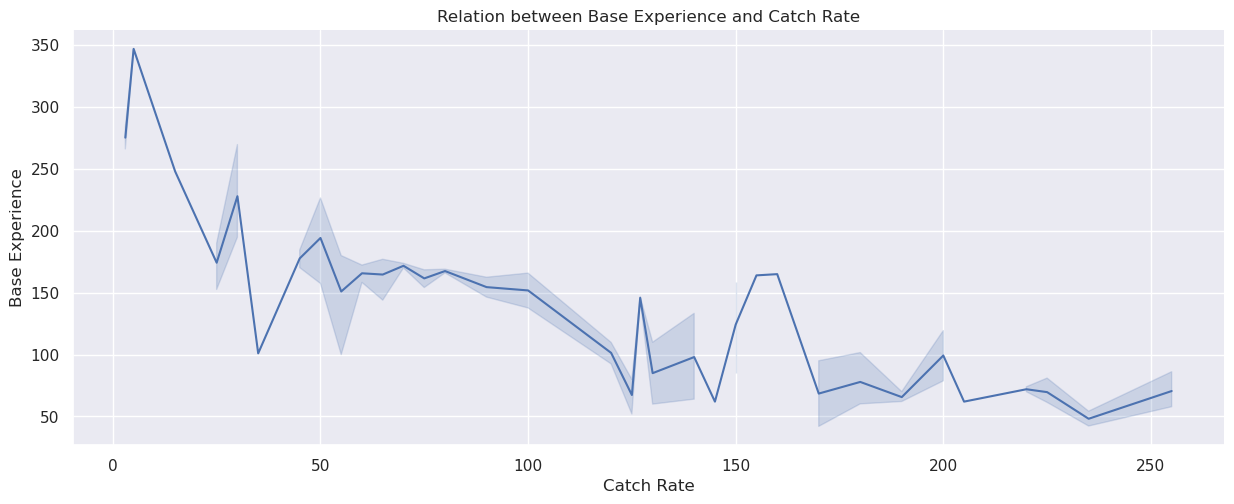

In [37]:
# Base EXP - Catch Rate

# sns.relplot(data=pokedex.groupby("catch_rate").apply(lambda df: df["total_points"].sum()/df.shape[0]),aspect=2,kind="line")
sns.relplot(data=pokedex,x="catch_rate",y="base_experience",kind="line",aspect=2.5)
plt.xlabel("Catch Rate")
plt.ylabel("Base Experience")
plt.title("Relation between Base Experience and Catch Rate")

Text(0.5, 1.0, 'Relation of Base EXP with Total Points')

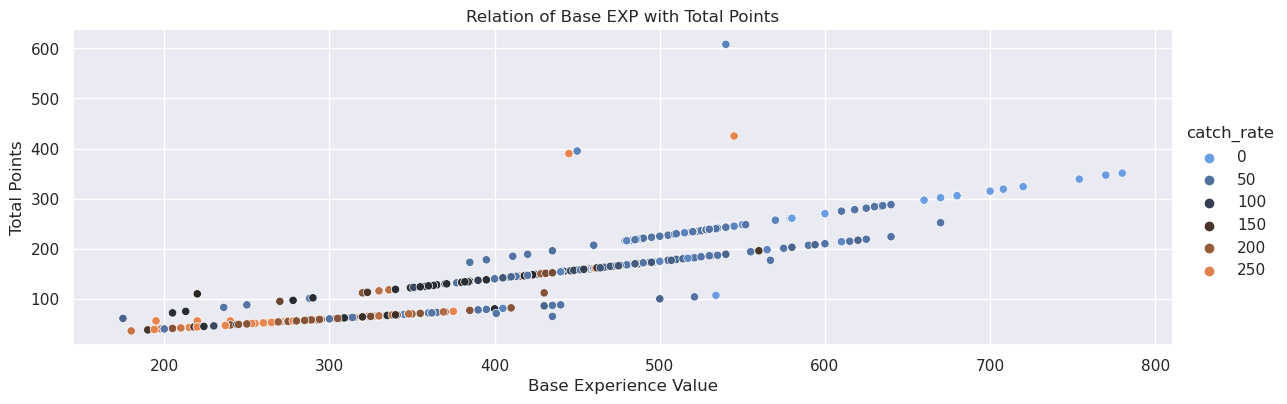

In [38]:
# Base EXP - Total points - Catch Rate

sns.relplot(data=pokedex,y="base_experience",x="total_points",hue="catch_rate",palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),height=4,aspect=3)
plt.xlabel("Base Experience Value")
plt.ylabel("Total Points")
plt.title("Relation of Base EXP with Total Points")

Text(0.5, 1.0, 'Relation of Base EXP with Total Points')

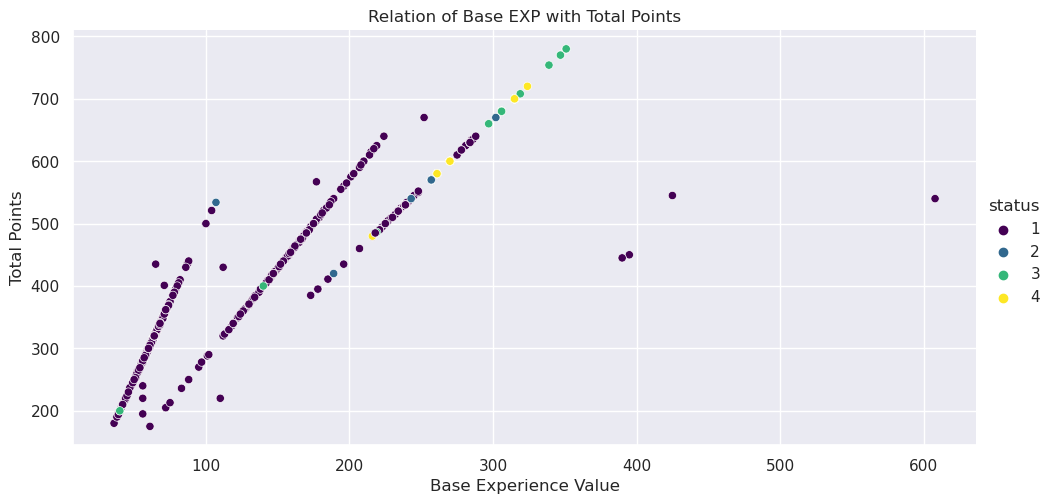

In [39]:
# Base EXP - Total points - Status

sns.relplot(data=pokedex,x="base_experience",y="total_points",hue="status",palette=sns.color_palette("viridis",as_cmap=True),height=5,aspect=2)
plt.xlabel("Base Experience Value")
plt.ylabel("Total Points")
plt.title("Relation of Base EXP with Total Points")

##### Analysis on Damage Multipliers properties of different Types of Pokemon: (Columns: D1 to D18)

In [40]:
# Initial analysis of 'DM' columns:

# The 'against_?' columns, although of type 'float64', have very 
# few unique values(ranging from 5 to 8). Hence they might as-well
# be considered categorical variables of a Pokemon.

# If one has ever played a Pokemon game, one would know these words:

#   Fire beats Grass. Grass beats Water. Water beats Fire.

# However, does the "real-world" data on Pokemons actually back such claims?
# Is there a defined relation between Damage multipliers and Pokemon Types?

# Furthermore, if there is such a relation, then how does it differ 
# for Pure Type Pokemons and Mixed Type Pokemons?

# Let us systematically examine the data to find such interesting 
# properties of Pokemon, if they even exist.

In [41]:
# Let us examine the relation of Type and its corresponding 
# Damage multipliers, seperately for Pure Type and Mixed Type Pokemon.

# For Pure Type Pokemon:
poke_pure = (pokedex.loc[pokedex['type_2']==0]).drop(columns=["type_2"],errors="ignore")
# For Mixed Type Pokemon:
poke_mixed = (pokedex.loc[pokedex['type_2']!=0]).copy()

In [42]:
# Defining the Relation that we are in search for:

#     We aim to draw a generalization of the form:
     
#         For all Pokemon known in existence,
#         Any 2 Pokemon that have the same Type, must have the same Damage Multiplier values, 
#         for any specific Type of Damage Multiplier being considered.

# Type being a property ***completely*** defined by the 'type_1' and 'type_2' columns of a Pokemon.

# It would mean, that The Damage Multiplier of any Pokemon against any Type 
# is independent of all variables which are independent of the Type variables of that Pokemon.
# Being able to prove such a statement would greatly reduce the complexity of our analysis.

In [43]:
# Finding relations between Type and Damage Multiplliers for Pure Types:

def calc_defs(df):
    s = pd.Series(dtype=object)
    for i in range(1,19): # 18 Types
        s[f"D{i}"] = dict(df[f"D{i}"].value_counts())
    return s

def_stats_pure = poke_pure.groupby("type_1").apply(calc_defs)
def_stats_pure.index = (type_encoding.iloc[def_stats_pure.index]).index

In [44]:
# An interesting way to check how well the relation holds is to see 
# for what fraction of table entries, the list of possibilities 
# has a length exactly 1. This is implemented in the following function.

def check_relation_validity(table):
    valid_entries = table.apply(lambda s: s.apply(lambda v: (len(v)==1) | ((min(v.keys())>1)^(max(v.keys())<1))).sum(),axis="index").sum()
    total_entries = table.shape[0]*table.shape[1]
    return valid_entries/total_entries*100

print("For Pure Types the relation holds",check_relation_validity(def_stats_pure),"\x25 of time.")
def_stats_pure.apply(lambda s: s.apply(lambda v:int((len(v)==1) | ((min(v.keys())>1)^(max(v.keys())<1)))),axis="index")

# Notice the anomalies in the relation. Most of the anomalous behaviour seems to be with the Psychic and Ice Type Pokemon. 

For Pure Types the relation holds 91.35802469135803 % of time.


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18
Bug,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dark,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dragon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Electric,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
Fairy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Fighting,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1
Fire,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Flying,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ghost,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
Grass,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [45]:
# Hence we observe that, **barring few exceptions**, most Pure Type 
# Pokemon of 1 Type, have the same Damage Multiplier against some type.

# Let us try to study some of these exceptions:

# One exception is in "Dragon" Type Pokemon, in the 'D10' column.
# Let us see how varied the Dragon types are in their defense against Grass(10):
print(def_stats_pure.loc["Dragon","D10"])

# The majority(10) of "Dragon" Types have 0.5 multiplier against Grass(10) Types. 
# There are 3 Pure Dragon Types which are "IMMUNE"(i.e. 0.0 multiplier) to Grass(10) Type:
poke_pure.loc[(poke_pure["type_1"]==type_encoding["Dragon"]) & (poke_pure["D10"]==0),["pokedex_number","generation","status","species"]]


# When speaking in an "approximate"/"aggregate"/"overall" manner, we might be permitted to omit such 
# exceptions to make a generalized statement on the Type dependency of 
# Damage multipliers BY ONLY CONSIDERING THE HIGHEST FREQUENCY VALUE.

#However, such a description will not be 100% accurate but more probabilistic.

{0.5: 10, 0.0: 3}


,pokedex_number,generation,status,species
819,704,6,1,518
820,705,6,1,518
821,706,6,1,71


In [46]:
# Mixed Type 'DM' analysis:

# Considering Primary Type only:
def_stats_mix = poke_mixed.groupby("type_1").apply(calc_defs)
# def_stats_mix.reset_index(inplace=True)
# def_stats_mix['type_1'] = def_stats_mix['type_1'].apply(lambda x: type_encoding.index[x])
print("Considering only Mixed Primary Types the relation holds",check_relation_validity(def_stats_mix),"\x25 of time.")
# There does not seem to be any prevalent relation observed.

# Considering Secondary Type only:
def_stats_mix = poke_mixed.groupby("type_2").apply(calc_defs)
# def_stats_mix.reset_index(inplace=True)
# def_stats_mix['type_2'] = def_stats_mix['type_2'].apply(lambda x: type_encoding.index[x])
print("Considering only Mixed Secondary Types the relation holds",check_relation_validity(def_stats_mix),"\x25 of time.")
# There does not seem to be any prevalent relation observed.

# There is scope for improvement in each measure, but not significant.

Considering only Mixed Primary Types the relation holds 7.098765432098765 % of time.
Considering only Mixed Secondary Types the relation holds 9.5679012345679 % of time.


In [47]:
# Considering both Primary and Secondary Types both:
def_stats_mix = poke_mixed.groupby(["type_1","type_2"]).apply(calc_defs)
print("Considering both Primary and Secondary Types the relation holds",check_relation_validity(def_stats_mix),"\x25 of time.")
# **Barring few exceptions**, a relation is observed!

Considering both Primary and Secondary Types the relation holds 98.78671775223499 % of time.


In [48]:
# Now, does the order of the Types matter? 
# Are Damage multipliers of (Bug, Electric) Type the same as that 
# of a (Electric, Bug) Type? Let us combine them and check.

# Orders the Primary and Secondary types to align types (a,b) and (b,a) for all 'a','b' in 'type_encoding'.
def fix_order(s):
    s.iloc[0],s.iloc[1] = min(s.iloc[0],s.iloc[1]),max(s.iloc[0],s.iloc[1])
    return s

def merge_types(df:pd.DataFrame):
    def merge_dicts(s):
        s_new = {}
        for i in s: # 'i' is a 'dict'
            for j in i: # 'j' is a dictionary 'key' (Cannot be -1)
                if(s_new.get(j,-1)==-1):
                    s_new[j] = i[j]
                else:
                    s_new[j] += i[j]
        return s_new        
    return df.apply(merge_dicts,axis="index")

def_stats_mix.reset_index(inplace=True)
def_stats_mix.loc[:,["type_1","type_2"]] = (def_stats_mix.loc[:,["type_1","type_2"]]).apply(fix_order,axis="columns")
def_stats_mix = def_stats_mix.groupby(['type_1','type_2']).apply(merge_types).reset_index()

def_stats_mix.sort_values(["type_1","type_2"],axis="index",inplace=True)

def_stats_mix["type_1"] = def_stats_mix["type_1"].apply(lambda x: type_encoding.index[x])
def_stats_mix["type_2"] = def_stats_mix["type_2"].apply(lambda x: type_encoding.index[x])

def_stats_mix.set_index(['type_1',"type_2"],inplace=True,drop=True)
def_stats_mix.rename_axis(index=[None,None],inplace=True)

print("For Mixed Types the *unordered relation* holds",check_relation_validity(def_stats_mix),"\x25 of time.")

# We see that the "relation strength" does not drop noticeably.
# Hence, we conclude that the relation between Damage Multiplier and Pokemon Type for Mixed Type Pokemon is independent 
# of the specific ordering of the types, as Primary or Secondary. 

# Thus, the property of Damage Multipliers(as a function of Type) is symmetric about the Primary and Secondary type variables of a Pokemon, to some extent, probably.
def_stats_mix.apply(lambda s: s.apply(lambda v: int((len(v)==1) | ((min(v.keys())>1)^(max(v.keys())<1)))),axis="index")

For Mixed Types the *unordered relation* holds 98.16176470588235 % of time.


D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  D11  D12  D13  D14  \
Bug     Electric   1   1   1   1   1   1   1   1   1    1    0    1    1    1   
        Fairy      1   1   1   1   1   1   1   1   1    1    1    1    1    1   
        Fighting   1   1   1   1   1   1   1   1   1    1    1    1    1    1   
        Fire       1   1   1   1   1   1   0   1   1    1    1    1    1    1   
        Flying     1   1   1   1   1   1   1   1   1    1    1    1    1    1   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
Psychic Steel      1   1   1   1   1   1   1   1   1    1    0    1    1    1   
        Water      1   1   1   1   1   1   1   1   1    1    1    1    1    1   
Rock    Steel      1   1   1   1   1   1   1   1   1    1    1    1    1    1   
        Water      1   1   1   1   1   1   1   1   1    1    1    1    1    1   
Steel   Water      1   1   1   1   1   1   1   1   1    1    1    1    1    1   

                  D15  D16  D17  D18  
Bug     Electric    1    1    1    1  
        Fairy       1    1    1    1  
        Fighting    1    1    1    1  
        Fire        1    1    1    1  
        Flying      1    1    1    1  
...               ...  ...  ...  ...  
Psychic Steel       1    1    1    1  
        Water       1    1    1    1  
Rock    Steel       1    1    1    1  
        Water       1    1    1    1  
Steel   Water       1    1    1    1  

[136 rows x 18 columns]

In [49]:
# Closing remarks on 'DM' analysis:

# Coming back to the inspiration to our analysis:
#   1) Does Fire beat Grass? 
#   2) Does Grass beat Water? 
#   3) Does Water beat Fire?

# Let us denote this attribute Damage multiplier by the notation: DM(A,B) ; where 'A' is any Pure/Mixed Type and 'B' is any Pure Type. 

# By definition if Damage multipliers are greater than 1 for Type A against Type B, then Type B is more effective against Type A. DM(A,B) > 1 ; (a.k.a B beats A)
# By definition if Damage multipliers are less than 1 for Type A against Type B, then Type B is less effective against Type A. DM(A,B) < 1 ;
# By definition if Damage multipliers are exactly equal to 1 for Type A against Type B, then Type B is unbiased to Type A. DM(A,B) = 1 ;

#An interesting observation would be that although 'Type A' can be either Pure or Mixed, 'Type B' can only be Pure.(According to given data)
# Thus it might be worth asking as to why there are no Mixed types when it comes to the Damage Multiplier columns(of which there are only 18).

In [50]:
# Question 1:
# For Pure Types:
print(def_stats_pure.loc["Grass","D7"])
print()
# For Mixed Types:
try:
    print(def_stats_mix.loc[("Grass",slice(None)),"D7"])
except(KeyError):
    pass
try:
    print(def_stats_mix.loc[(slice(None),"Grass"),"D7"])
except(KeyError):
    pass

# For all 43 Pure Types it is True.

# Incase of Mixed Types, it holds True for 
# 65 Mixed Grass-? types except the following:
    
#     1 Poison-Grass type Pokemon
#     All 2 Grass-Rock type Pokemon
#     All 3 Grass-Water type Pokemon
#     All 5 Dragon-Grass type Pokemon

# A total of 11 exceptions.
# Hence, for Mixed Types it holds True, around 85.53% of cases.


{2.0: 43}

Grass  Ground              {2.0: 1}
       Ice                 {4.0: 3}
       Normal              {2.0: 2}
       Poison     {2.0: 14, 1.0: 1}
       Psychic             {2.0: 4}
       Rock                {1.0: 2}
       Steel               {4.0: 3}
       Water               {1.0: 3}
Name: D7, dtype: object
Bug       Grass     {4.0: 6}
Dark      Grass     {2.0: 4}
Dragon    Grass     {1.0: 5}
Electric  Grass     {2.0: 1}
Fairy     Grass     {2.0: 5}
Fighting  Grass     {2.0: 3}
Flying    Grass     {2.0: 7}
Ghost     Grass    {2.0: 12}
Name: D7, dtype: object


In [51]:
# Question 2:
# For Pure Types:
print(def_stats_pure.loc["Water","D10"])
print()
# For Mixed Types:
try:
    print(def_stats_mix.loc[("Water",slice(None)),"D10"])
except(KeyError):
    pass
try:
    print(def_stats_mix.loc[(slice(None),"Water"),"D10"])
except(KeyError):
    pass


# For all 72 Pure Types it is True.

# Incase of Mixed Types, it holds True for 
# 55 Mixed Water-? types except the following:
    
#     Bug-Water types: 5
#     Dragon-Water types: 3
#     Fire-Water types: 1
#     Flying-Water types: 8
#     Grass-Water types: 3
#     Poison-Water types: 6
#     Steel-Water types: 1

# A total of 27 exceptions.
# Hence, for Mixed Types it holds True, around 67.07% of cases.

{2.0: 72}

Bug       Water            {1.0: 5}
Dark      Water            {2.0: 7}
Dragon    Water            {1.0: 3}
Electric  Water            {2.0: 3}
Fairy     Water            {2.0: 4}
Fighting  Water            {2.0: 4}
Fire      Water            {1.0: 1}
Flying    Water            {1.0: 8}
Ghost     Water            {2.0: 2}
Grass     Water            {1.0: 3}
Ground    Water           {4.0: 10}
Ice       Water            {2.0: 7}
Normal    Water            {2.0: 1}
Poison    Water            {1.0: 6}
Psychic   Water            {2.0: 6}
Rock      Water    {4.0: 9, 3.0: 2}
Steel     Water            {1.0: 1}
Name: D10, dtype: object


In [52]:
# Question 3:
# For Pure Types:
print(def_stats_pure.loc["Fire","D18"])
print()
# For Mixed Types:
try:
    print(def_stats_mix.loc[("Fire",slice(None)),"D18"])
except(KeyError):
    pass
try:
    print(def_stats_mix.loc[(slice(None),"Fire"),"D18"])
except(KeyError):
    pass

# For all 34 Pure Types it is True.

# Incase of Mixed Types, it holds True for 
# 44 Mixed Fire-? types except the following:
    
#     Fire-Ground types: 1
#     Fire-Water types: 1
#     Dragon-Fire types: 3

# A total of 5 exceptions.
# Hence, for Mixed Types it holds True, around 89.80% of cases.


{2.0: 34}

Fire  Flying                     {2.0: 7}
      Ghost                      {2.0: 5}
      Ground     {4.0: 2, 3.0: 1, 0.0: 1}
      Ice                        {2.0: 1}
      Normal                     {2.0: 2}
      Poison                     {2.0: 2}
      Psychic                    {2.0: 3}
      Rock                       {4.0: 3}
      Steel                      {2.0: 1}
      Water                      {0.0: 1}
Name: D18, dtype: object
Bug       Fire    {2.0: 4}
Dark      Fire    {2.0: 4}
Dragon    Fire    {1.0: 3}
Electric  Fire    {2.0: 1}
Fighting  Fire    {2.0: 7}
Name: D18, dtype: object


In [53]:
# Closing remarks on 'DM' analysis:

# When considering the Pure Types only, all statements 
# are always True, for all 149/149 Pure Type Pokemon.
# (Interestingly, out of the 492 Pure Type Pokemon, 149 belong to either Fire, Water, or Grass types)

# When considering Mixed Types: 

#     The first statement holds true 65/76 times.
#     The second statement holds true 55/82 times.
#     The third statement holds true 44/49 times.

# Thus on average, for a Mixed Type, the statements are True 164/207 of times.

# In total, for all Pokemon to which these statements apply, the statements are True 313/356 (87.92%) of times.

# The exceptions are somewhat reasonable and obvious, for there is ambiguity 
# in interpretation of the statements for the following types of Pokemon:

#     Fire-Water Type ; Grass-Water Type ;  (and the non-existent) Fire-Grass Type ;


# Yes, Indeed. On Venturing far, we Pilgrims Discover the Truth of the Old Words:

#     Fire beats Grass. Grass beats Water. Water beats Fire.

In [54]:
# Additional analysis of 'DM' columns:

# An interesting follow-up question might be: 
# If Type A is more effective against Type B , then is Type B less effective against Type A ? Does the converse hold True as well?

# Let us interpret the first of the 2 questions by the following equation: (DM(A,B) < 1 <= DM(B,A) > 1) ; (<= is the implication operator in this context)
# Due to the absence of Mixed type columns for Damage multipliers, 
# we can only evidently define such questions when both Type B and Type A are Pure.


# The 'def_stats_pure' is an 18x18 DataFrame, corresponding to the 18 Types, the axes in sorted order of 'type_encoding':
print(def_stats_pure.shape)

# As the rows and columns are in **sorted order** of 'type_encoding', DM(A,B) and DM(B,A) 
# are simply reflections about the "main" diagonal of the square matrix 'def_stats_pure'
def_stats_pure

(18, 18)


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18
Bug,{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{0.5: 19},{2.0: 19},{2.0: 19},{1.0: 19},{0.5: 19},{0.5: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{2.0: 19},{1.0: 19},{1.0: 19}
Dark,{2.0: 14},{0.5: 14},{1.0: 14},{1.0: 14},{2.0: 14},{2.0: 14},{1.0: 14},{1.0: 14},{0.5: 14},{1.0: 14},{1.0: 14},{1.0: 14},{1.0: 14},{1.0: 14},{0.0: 14},{1.0: 14},{1.0: 14},{1.0: 14}
Dragon,{1.0: 13},{1.0: 13},{2.0: 13},{0.5: 13},{2.0: 13},{1.0: 13},{0.5: 13},{1.0: 13},{1.0: 13},"{0.5: 10, 0.0: 3}",{1.0: 13},{2.0: 13},{1.0: 13},{1.0: 13},{1.0: 13},{1.0: 13},{1.0: 13},{0.5: 13}
Electric,{1.0: 34},{1.0: 34},{1.0: 34},"{0.5: 26, 0.0: 8}",{1.0: 34},{1.0: 34},{1.0: 34},{0.5: 34},{1.0: 34},{1.0: 34},"{2.0: 31, 0.0: 3}",{1.0: 34},{1.0: 34},{1.0: 34},{1.0: 34},{1.0: 34},{0.5: 34},{1.0: 34}
Fairy,{0.5: 19},{0.5: 19},{0.0: 19},{1.0: 19},{1.0: 19},{0.5: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{1.0: 19},{2.0: 19},{1.0: 19},{1.0: 19},{2.0: 19},{1.0: 19}
Fighting,{0.5: 29},{0.5: 29},{1.0: 29},{1.0: 29},{2.0: 29},{1.0: 29},"{1.0: 27, 0.5: 2}",{2.0: 29},{1.0: 29},{1.0: 29},{1.0: 29},"{1.0: 27, 0.5: 2}",{1.0: 29},{1.0: 29},{2.0: 29},{0.5: 29},{1.0: 29},{1.0: 29}
Fire,{0.5: 34},{1.0: 34},{1.0: 34},{1.0: 34},{0.5: 34},{1.0: 34},"{0.5: 31, 0.0: 3}",{1.0: 34},{1.0: 34},{0.5: 34},{2.0: 34},{0.5: 34},{1.0: 34},{1.0: 34},{1.0: 34},{2.0: 34},{0.5: 34},{2.0: 34}
Flying,{0.5: 4},{1.0: 4},{1.0: 4},{2.0: 4},{1.0: 4},{0.5: 4},{1.0: 4},{1.0: 4},{1.0: 4},{0.5: 4},{0.0: 4},{2.0: 4},{1.0: 4},{1.0: 4},{1.0: 4},{2.0: 4},{1.0: 4},{1.0: 4}
Ghost,{0.5: 15},{2.0: 15},{1.0: 15},{1.0: 15},{1.0: 15},{0.0: 15},{1.0: 15},{1.0: 15},{2.0: 15},{1.0: 15},"{1.0: 12, 0.0: 3}",{1.0: 15},{0.0: 15},{0.5: 15},{1.0: 15},{1.0: 15},{1.0: 15},{1.0: 15}
Grass,{2.0: 43},{1.0: 43},{1.0: 43},{0.5: 43},{1.0: 43},{1.0: 43},{2.0: 43},{2.0: 43},{1.0: 43},"{0.5: 41, 0.0: 2}","{0.5: 42, 0.0: 1}",{2.0: 43},{1.0: 43},{2.0: 43},{1.0: 43},{1.0: 43},{1.0: 43},"{0.5: 42, 0.0: 1}"


In [55]:
# We saw previously, that most of the anomalies in our relation were due to *Psychic* and *Ice* Type Pokemon.

# Looking at the anomalous entries, we observe that such a behaviour is due to a minority of Pokemon of each such Type.
# For example, (Psychic,D1) has 44 Pokemon with DM > 1 and only 1 Pokemon with DM < 1.
# For example, (Ice,D7) has 19 Pokemon with DM > 1 and only 1 Pokemon with DM < 1.

# Let us modify the table, to only hold the MOST FREQUENT value, before we check for our relation. 
# (This is not an accurate method when there are a large number of exceptions)
def most_freq(d:dict):
    max = -1
    for i in d: # 'd' is a dict
        if(d[i]>d.get(max,-1)):
            max = i
    return max

def show_relation(table:pd.DataFrame):
    if(table.shape[0]!=table.shape[1]):
        return pd.DataFrame(0,index=table.index,columns=table.columns)
    for i in range(table.shape[0]):
        for j in range(table.shape[1]):
            table.iloc[i,j] = ((table.iloc[i,j]==1)*(2*(table.iloc[j,i]==1)-1)) # Relation (3) being tested currently in expression.
    return table

# '-1' means relation is violated, '1' means relation holds. '0' signifies relation does not apply.(i.e. When 'A' is False in the relation A => B)
show_relation(def_stats_pure.apply(lambda s: s.apply(most_freq),axis="index")).astype("int8")

# Primary relation: (1)
# For the relation  (DM(A,B) > 1 => DM(B,A) < 1), we get the following results:
# The relation holds 39/51 times and is violated 12/51 times, of all 51 times that it is tested.

# Converse relation: (2)
# For the converse relation (DM(A,B) < 1 => DM(B,A) > 1), we get the following results:
# The relation holds 14/69 times and is violated 55/69 times, that it is tested.

# Third relation: (3)
# For the relation (DM(A,B) = 1 => DM(B,A) = 1), we get the following results: 
# (We can prove that this relation is equivalent to : (DM(A,B) = 1 <=> DM(B,A) = 1))
# The relation holds 159/204 times and is violated 45/204 times that it is tested.

# Notice that, (51+69+204) = (18*18) = 324 . This is because, for all entries(x) in DM table, either x=1 or x>1 or x<1.
# The final results, even after artificial removal of anomalies, do not hold True in general.

# The cumulative validity comes to around 45.10%. Thus it is approximately as likely to not be True as it is likely to be True.

# NOTE:
# These calculations also do not take into account the weightage that might be 
# given to each of the total number of cases with respect to 
# the NUMBER OF POKEMON, for which it holds or is violated. 
# Uniform distribution of Pokemon among Types and hence equal weightage is assumed.(which is incorrect)

# Some more questions we leave unanswered but might be worth asking:

# Given some subset of Damage Multipliers of a Pokemon, would we be able to deduce the Pokemon's Type? Can we tell if it is Mixed or Pure?
# Do there exist Types about which the Damage Multiplier tables are symmetric?

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18
Bug,1,-1,1,1,-1,0,0,0,-1,0,0,1,1,-1,-1,0,-1,1
Dark,0,0,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1
Dragon,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,-1,0
Electric,1,1,-1,0,1,1,1,0,1,-1,0,1,1,1,1,1,0,-1
Fairy,0,0,0,1,1,0,-1,1,1,1,1,1,1,0,1,1,0,1
Fighting,0,0,1,1,0,1,1,0,-1,1,1,-1,-1,-1,0,0,-1,1
Fire,0,1,-1,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0
Flying,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0,-1,1
Ghost,0,0,1,1,1,0,1,1,0,1,1,1,0,0,-1,1,1,1
Grass,0,1,-1,0,1,1,0,0,1,0,0,0,1,0,1,-1,-1,0


In [56]:
# Conclusions on 'DM' analysis:

#     We deduced that for Mixed and Pure Type Pokemon, there is a strong relation between their Type, 
#     and the effectiveness/ineffectiveness described by Damage Multiplers when facing against other Types.
#     As long as we know a Pokemon's Type, we can, with high level of confidence, predict whether its 
#     corresponding DM values are greater than, less than or equal to 1 against any Type.
pokedex.apply(desc_col,axis="index").T.reset_index()

,index,Count,Missing,Unique Count,Data Type,Mean,Deviation,Minimum,Maximum
0,pokedex_number,1045,0,898,int64,440.769378,262.517231,1,898
1,name,1045,0,1045,object,NaN,NaN,NaN,NaN
2,generation,1045,0,8,int64,4.098565,2.272788,1,8
3,status,1045,0,4,int64,1.219139,0.651271,1,4
4,species,1045,0,652,int64,285.697608,198.263458,0,651
5,type_1,1045,0,18,int64,10.407656,5.524097,1,18
6,type_2,1045,0,19,int64,5.041148,5.827109,0,18
7,height_m,1045,0,61,float64,1.374067,3.353349,0.1,100.0
8,weight_kg,1044,1,474,float64,71.216571,132.259911,0.1,999.9
9,ability_1,1045,0,213,int64,137.22201,74.445257,0,265


##### Feature Engineering and Encoding 'name' of Pokemon:

In [57]:
# The 'name' of a Pokemon:

# Observing the distribution of characters across 'name' values:
# THE 'name' ALPHABET : 

name_ALPH = pd.Series(dtype=np.int64)
for i in pokedex["name"]:
    for j in i:
        name_ALPH[j] = name_ALPH.get(j,0) + 1

name_ALPH.sort_index(inplace=True)
print(name_ALPH.index)
# name_ALPH plot to visualise distributrion.

# Notice, the English alphabet occupying indices '10' to '-4'. Whitespaces ' ' at index '1', may be ommitted in the count.
print("The 'name' alphabet matches the English alphabet with",name_ALPH.iloc[10:-3].sum()/name_ALPH.iloc[:].sum()*100,"\x25 accuracy.")

Index([' ', '%', ''', '-', '.', '0', '1', '2', '5', ':', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', 'é', '♀', '♂'],
      dtype='object')
The 'name' alphabet matches the English alphabet with 96.84199408534009 % accuracy.


In [58]:
# The 'name' of a Pokemon:

# Studying frequency of words in 'name' values.
# The 'name' LEXICON :

name_LXCO = pd.Series(dtype=np.int64)
for i in pokedex["name"]:
    for j in i.split():
        name_LXCO[j] = name_LXCO.get(j,0) + 1
name_LXCO.sort_values(inplace=True,ascending=False)
print(name_LXCO.head(25))

Mega          48
Forme         23
Galarian      20
Alolan        18
Form          14
Size           8
Mode           6
Style          6
Rotom          6
Tapu           4
Necrozma       4
Castform       4
Gourgeist      4
Hoopa          4
Darmanitan     4
Pumpkaboo      4
Oricorio       4
Deoxys         4
Calyrex        3
Lycanroc       3
Mr.            3
Mewtwo         3
Zygarde        3
Wormadam       3
Incarnate      3
dtype: int64


In [59]:
# The 'name' of a Pokemon:

""" 
The following observations are made:

"Mega", "Galarian", "Alolan" act as Prefixes to many otherwise common Pokemon names.

"Form", "Forme", "Size", "Mode", "Style" are **parts** of Suffixes to many common Pokemon names. Usually, 
these suffixes are present along with some additional key-word and when seperated along with those key-words, 
multiple Pokemon share the same name.

Some rare suffixes such as 'X' and 'Y' are also found, which are shared by Pokemon, which otherwise have a common name.

Some rare prefixes are also found, such as 'Heat', 'Wash', 'Frost', 'Fan', shared by Pokemon, which otherwise 
have a common name.(The name being 'Rotom')

For the rare prefixes, how did I know that 'Rotom' was not the suffix and these were the prefixes? For the rare suffixes?

HYPOTHESIS:

    Any Pokemon 'name' can be broken down into a 'Suffix', 'Prefix' and a **1-word** name. These **1-word** 
    names all correspond to "similar" Pokemon, while the suffixes and prefixes signal some form of modifications.

    The definition of which Pokemon are to be considered "similar" is still ambiguous. This is because any string 
    of words can be broken down, in multiple ways, into 'Suffix', 'Prefix' and a 1-word residue.

ANOMALIES: Hoopa Hoopa, Mr. Mime ; Mr. Rime ; Mime Jr. ; Type: Null ; (Not 1 word common names)

In our analysis, we start from the most frequently occuring words to be taken as 'suffix'/'prefix' and then proceed to 
lesser frequent words to be considered as suffixes or prefixes.
"""

prefix_encoding = pd.Series(dtype=np.int64)
prefix_encoding[""] = 0
# Create a 'Prefix' column:
pokedex["prefix"] = 0

suffix_encoding = pd.Series(dtype=np.int64)
suffix_encoding[""] = 0
# Creating 'Suffix' column:
pokedex["suffix"] = 0

In [60]:
pokedex[pokedex["name"].str.contains("Rotom | Rotom")]

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,ability_1,...,D15,D1,D16,D9,D3,D2,D17,D5,prefix,suffix
570,479,Heat Rotom,4,1,347,4,7,0.3,0.3,109,...,1.0,0.5,2.0,1.0,1.0,1.0,0.25,0.5,0,0
571,479,Wash Rotom,4,1,347,4,18,0.3,0.3,109,...,1.0,1.0,1.0,1.0,1.0,1.0,0.25,1.0,0,0
572,479,Frost Rotom,4,1,347,4,12,0.3,0.3,109,...,1.0,1.0,2.0,1.0,1.0,1.0,1.00,1.0,0,0
573,479,Fan Rotom,4,1,347,4,8,0.3,0.3,109,...,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.0,0,0
574,479,Mow Rotom,4,1,347,4,10,0.3,0.3,109,...,1.0,2.0,1.0,1.0,1.0,1.0,0.50,1.0,0,0


In [61]:
# Encoding Prefixes:

# Encoding the 'Mega', 'Galarian' and 'Alolan' prefixes:
prefix_encoding["Mega"] = prefix_encoding.get("Mega",prefix_encoding.size)
prefix_encoding["Galarian"] = prefix_encoding.get("Galarian",prefix_encoding.size)
prefix_encoding["Alolan"] = prefix_encoding.get("Alolan",prefix_encoding.size)

def set_prefix(s,table,words=1):
    parts = re.split('\s',s["name"],1) # 1 word prefix seperated.

    if(table.get(parts[0],-1)!=-1):
        s["prefix"] = table[parts[0]]
        if(len(parts)!=1):
            s["name"] = parts[1]
        else:
            s["name"] = ""
    return s

# Update the prefixes and modify the names:
pokedex = pokedex.apply(set_prefix,axis="columns",table=prefix_encoding)

# Encoding Heat, Wash, Frost, Fan and Mow prefixes:
prefix_encoding["Heat"] = prefix_encoding.get("Heat",prefix_encoding.size)
prefix_encoding["Wash"] = prefix_encoding.get("Wash",prefix_encoding.size)
prefix_encoding["Frost"] = prefix_encoding.get("Frost",prefix_encoding.size)
prefix_encoding["Fan"] = prefix_encoding.get("Fan",prefix_encoding.size)
prefix_encoding["Mow"] = prefix_encoding.get("Mow",prefix_encoding.size)

# Update the prefixes and modify the names:
pokedex = pokedex.apply(set_prefix,axis="columns",table=prefix_encoding)


In [62]:
pokedex[pokedex["name"].str.contains(" Style|Style ")]

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,ability_1,...,D15,D1,D16,D9,D3,D2,D17,D5,prefix,suffix
866,741,Oricorio Baile Style,7,1,76,7,8,0.6,3.4,38,...,1.0,0.25,4.0,1.0,1.0,1.00,0.5,0.5,0,0
867,741,Oricorio Pom-Pom Style,7,1,76,4,8,0.6,3.4,38,...,1.0,0.50,2.0,1.0,1.0,1.00,0.5,1.0,0,0
868,741,Oricorio Pa'u Style,7,1,76,15,8,0.6,3.4,38,...,0.5,1.00,2.0,2.0,1.0,2.00,1.0,1.0,0,0
869,741,Oricorio Sensu Style,7,1,76,9,8,0.6,3.4,38,...,1.0,0.25,2.0,2.0,1.0,2.00,1.0,1.0,0,0
1035,892,Urshifu Single Strike Style,8,2,644,6,2,1.9,105.0,252,...,0.0,1.00,0.5,0.5,1.0,0.25,1.0,4.0,0,0
1036,892,Urshifu Rapid Strike Style,8,2,644,6,18,1.9,105.0,252,...,2.0,0.50,0.5,1.0,1.0,0.50,0.5,2.0,0,0


In [63]:
# Encoding Suffixes:

def set_suffix(s:str,table):
    suf =  re.split('\s',s,1)[1] # First word is the 1-word common name. Rest is the suffix.
    table[suf] = table.get(suf,table.size)
    return table[suf]

# Observation:
# All 'Forme' suffixes are 2 word. All common parts in the names are 1 word.
pokedex.loc[pokedex["name"].str.contains(" Forme"),"suffix"] = pokedex[pokedex["name"].str.contains(" Forme")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Forme"),"name"] = pokedex[pokedex["name"].str.contains(" Forme")]["name"].apply(lambda s: re.split('\s',s,1)[0])


# Observation:
# All 'Form' suffixes are 2 word as well. All common parts in the names are 1 word as well.
pokedex.loc[pokedex["name"].str.contains(" Form"),"suffix"] = pokedex[pokedex["name"].str.contains(" Form")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Form"),"name"] = pokedex[pokedex["name"].str.contains(" Form")]["name"].apply(lambda s: re.split('\s',s,1)[0])


# Observation:
# All 'Size' suffixes are 2 word as well. All common parts in the names are 1 word as well.
pokedex.loc[pokedex["name"].str.contains(" Size"),"suffix"] = pokedex[pokedex["name"].str.contains(" Size")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Size"),"name"] = pokedex[pokedex["name"].str.contains(" Size")]["name"].apply(lambda s: re.split('\s',s,1)[0])


# Observation:
# All but 1 'Mode' suffixes are 2 word as well. All common parts in the names are 1 word as well.
pokedex.loc[pokedex["name"].str.contains(" Mode"),"suffix"] = pokedex[pokedex["name"].str.contains(" Mode")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Mode"),"name"] = pokedex[pokedex["name"].str.contains(" Mode")]["name"].apply(lambda s: re.split('\s',s,1)[0])


# Observation:
# All 'Style' suffixes have 1 word in the common part of their names.
pokedex.loc[pokedex["name"].str.contains(" Style"),"suffix"] = pokedex[pokedex["name"].str.contains(" Style")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Style"),"name"] = pokedex[pokedex["name"].str.contains(" Style")]["name"].apply(lambda s: re.split('\s',s,1)[0])


In [64]:
# A different approach:

# Having encoded a lot of suffixes and prefixes, the entires in the 'name_LXCO' table have started 
# to lead us to 1 word Pokemon names. Hence let's change our approach and find multi-word names:
pokedex[pokedex["name"].apply(lambda s: len(s.split()))>1].iloc[:,[0,1,4]]

# To understand whether these Pokemon names contain prefixes/suffixes in them, we can look at the 'pokedex_number' 
# column for hints. If two differently named Pokemon, correspond to the same 'pokedex_number', then we 
# may be correct in our judgement to consider them to be "similar" with some modifications.

,pokedex_number,name,species
7,6,Charizard X,2
8,6,Charizard Y,2
33,25,Partner Pikachu,13
157,122,Mr. Mime,75
158,122,Mr. Mime,76
172,133,Partner Eevee,87
194,150,Mewtwo X,98
195,150,Mewtwo Y,98
460,382,Primal Kyogre,274
462,383,Primal Groudon,275


In [65]:
pokedex[pokedex["pokedex_number"]==890]

,pokedex_number,name,generation,status,species,type_1,type_2,height_m,weight_kg,ability_1,...,D15,D1,D16,D9,D3,D2,D17,D5,prefix,suffix
1032,890,Eternatus,8,3,643,14,3,20.0,950.0,159,...,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,0,0
1033,890,Eternatus Eternamax,8,3,643,14,3,100.0,NaN,0,...,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,0,0


In [66]:
# Encoding remaining Suffixes:

# suffix 'X' and 'Y': All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" X"),"suffix"] = pokedex[pokedex["name"].str.contains(" X")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" X"),"name"] = pokedex[pokedex["name"].str.contains(" X")]["name"].apply(lambda s: re.split('\s',s,1)[0])

pokedex.loc[pokedex["name"].str.contains(" Y"),"suffix"] = pokedex[pokedex["name"].str.contains(" Y")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Y"),"name"] = pokedex[pokedex["name"].str.contains(" Y")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# 'Cloak' suffix: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Cloak"),"suffix"] = pokedex[pokedex["name"].str.contains(" Cloak")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Cloak"),"name"] = pokedex[pokedex["name"].str.contains(" Cloak")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# 'Male' and 'Female' suffixes: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Male"),"suffix"] = pokedex[pokedex["name"].str.contains(" Male")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Male"),"name"] = pokedex[pokedex["name"].str.contains(" Male")]["name"].apply(lambda s: re.split('\s',s,1)[0])

pokedex.loc[pokedex["name"].str.contains(" Female"),"suffix"] = pokedex[pokedex["name"].str.contains(" Female")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Female"),"name"] = pokedex[pokedex["name"].str.contains(" Female")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# 'Rider' suffix: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Rider"),"suffix"] = pokedex[pokedex["name"].str.contains(" Rider")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Rider"),"name"] = pokedex[pokedex["name"].str.contains(" Rider")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# 'Face' suffix: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Face"),"suffix"] = pokedex[pokedex["name"].str.contains(" Face")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Face"),"name"] = pokedex[pokedex["name"].str.contains(" Face")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# '... Many Battles', 'Crowned Shield' and 'Crowned Sword' suffixes: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Battles"),"suffix"] = pokedex[pokedex["name"].str.contains(" Battles")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Battles"),"name"] = pokedex[pokedex["name"].str.contains(" Battles")]["name"].apply(lambda s: re.split('\s',s,1)[0])

pokedex.loc[pokedex["name"].str.contains(" Shield"),"suffix"] = pokedex[pokedex["name"].str.contains(" Shield")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Shield"),"name"] = pokedex[pokedex["name"].str.contains(" Shield")]["name"].apply(lambda s: re.split('\s',s,1)[0])

pokedex.loc[pokedex["name"].str.contains(" Sword"),"suffix"] = pokedex[pokedex["name"].str.contains(" Sword")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Sword"),"name"] = pokedex[pokedex["name"].str.contains(" Sword")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# 'Eternamax' suffix: All Pokemon with these suffixes have 1 word common names.
pokedex.loc[pokedex["name"].str.contains(" Eternamax"),"suffix"] = pokedex[pokedex["name"].str.contains(" Eternamax")]["name"].apply(set_suffix,table=suffix_encoding)
pokedex.loc[pokedex["name"].str.contains(" Eternamax"),"name"] = pokedex[pokedex["name"].str.contains(" Eternamax")]["name"].apply(lambda s: re.split('\s',s,1)[0])

# The suffixes of the Pokemon 'Hoopa Hoopa': Indices: 844, 845 ;
# "Hoopa Hoopa" has 2 words in the common name between its variants. Hence, we need to handle its suffixes seperately.
# The suffixes are: "Unbound" and "Confined":
suffix_encoding["Confined"] = suffix_encoding.get("Confined",suffix_encoding.size)
suffix_encoding["Unbound"] = suffix_encoding.get("Unbound",suffix_encoding.size)

pokedex.loc[844,"name"] = pokedex.loc[845,"name"] = "Hoopa Hoopa"
pokedex.loc[844,"suffix"] = suffix_encoding["Confined"]
pokedex.loc[845,"suffix"] = suffix_encoding["Unbound"] 

In [67]:
# Encoding remaining Prefixes:

# The 'Partner' prefix:
prefix_encoding["Partner"] = prefix_encoding.get("Partner",prefix_encoding.size)
# The 'Tapu' prefix:
prefix_encoding["Tapu"] = prefix_encoding.get("Tapu",prefix_encoding.size)
# The 'Primal' prefix:
prefix_encoding["Primal"] = prefix_encoding.get("Primal",prefix_encoding.size)
# The 'Black' and 'White' prefixes:
prefix_encoding["Black"] = prefix_encoding.get("Black",prefix_encoding.size)
prefix_encoding["White"] = prefix_encoding.get("White",prefix_encoding.size)
# The 'Ultra' prefix:
prefix_encoding["Ultra"] = prefix_encoding.get("Ultra",prefix_encoding.size)

pokedex = pokedex.apply(set_prefix,axis="columns",table=prefix_encoding)

# EXCEPTIONS: The "Dawn Wings", "Dusk Mane", and "Own Tempo" prefixes: (2 word prefixes)
prefix_encoding["Dawn Wings"] = prefix_encoding.get("Dawn Wings",prefix_encoding.size)
pokedex.loc[935,"name"] = "Necrozma"
pokedex.loc[935,"prefix"] = prefix_encoding["Dawn Wings"]
prefix_encoding["Dusk Mane"] = prefix_encoding.get("Dusk Mane",prefix_encoding.size)
pokedex.loc[934,"name"] = "Necrozma"
pokedex.loc[934,"prefix"] = prefix_encoding["Dusk Mane"]
prefix_encoding["Own Tempo"] = prefix_encoding.get("Own Tempo",prefix_encoding.size)
pokedex.loc[873,"name"] = "Rockruff"
pokedex.loc[873,"prefix"] = prefix_encoding["Own Tempo"]

# All the Pokemon with the above prefixes, have a 1 word common name.


In [68]:
# Closing analysis of 'name' of a Pokemon:

# Now, after having removed Prefixes and Suffixes, can we say that the 'name' 
# is the unique identifier of the 'pokedex_number', and vice-versa?

# Does there exist any 'pokedex_number' which corresponds to more than 1 'name'. (YES, ONLY Counter Example: 658)
print("Does any exception exist:",(pokedex.groupby("pokedex_number").apply(lambda df: df["name"].unique().size).sort_values(ascending=False)>1).any())

# Does there exist any 'name' which corresponds to more than 1 'pokedex_number'. (NO!)
print("Does any exception exist:",(pokedex.groupby("name").apply(lambda df: df["pokedex_number"].unique().size).sort_values(ascending=False)>1).any())

# Barring the ONLY exception, 'pokedex_number' 658, we the residual 'name' of a Pokemon 
# holds a unique 1-to-1 relation to the 'pokedex_number' column.
print(pokedex[pokedex["pokedex_number"]==658].iloc[:,[1,2,3,4,5,45,46]])

# Let us handle this exception by giving Pokemon 771 a suffix to represent its "Ash"-ness.
suffix_encoding["Ashy"] = suffix_encoding.get("Ashy",suffix_encoding.size)
pokedex.loc[771,"name"] = "Greninja"
pokedex.loc[771,"suffix"] = suffix_encoding["Ashy"]

# Does there exist any 'pokedex_number' which corresponds to more than 1 'name' now?
print("Does any exception exist now:",(pokedex.groupby("pokedex_number").apply(lambda df: df["name"].unique().size).sort_values(ascending=False)>1).any())

# Hence, we have found the bijective relation between 'pokedex_number' and our modified 'name', which holds for all known Pokemon in existence.
# Let us use this relation to reduce the complexity of Pokemon by Encoding the 'name's by this relation.
name_encoding = pokedex.groupby("name").apply(lambda df: max(df["pokedex_number"].unique()))
name_encoding["Null"] = 0 # To match Pokedex Numbers with encoding indices.
name_encoding.sort_values(inplace=True)

# No further analysis on the 'name' of a Pokemon:
pokedex.drop(columns=["name"],inplace=True,errors="ignore")

# Hence our intuition of "similar" Pokemon names unveiled the underlying relation that 'name' held with 'pokedex_number'.
name_encoding.head(10)

Does any exception exist: True
Does any exception exist: False
             name  generation  status  species  type_1  prefix  suffix
770      Greninja           6       1      198      18       0       0
771  Ash-Greninja           6       1      198      18       0       0
Does any exception exist now: False


name
Null          0
Bulbasaur     1
Ivysaur       2
Venusaur      3
Charmander    4
Charmeleon    5
Charizard     6
Squirtle      7
Wartortle     8
Blastoise     9
dtype: int64

In [69]:
# Reordering 'prefix' and 'suffix' columns:
new_order = ['prefix', 'pokedex_number', 'suffix', 'generation', 'status', 'species', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male',
       'egg_cycles', 'D13', 'D7', 'D18', 'D4', 'D10', 'D12', 'D6', 'D14',
       'D11', 'D8', 'D15', 'D1', 'D16', 'D9', 'D3', 'D2', 'D17', 'D5',]
pokedex = pokedex.loc[:,new_order]

In [70]:
pokedex.apply(desc_col,axis="index").T.reset_index()

,index,Count,Missing,Unique Count,Data Type,Mean,Deviation,Minimum,Maximum
0,prefix,1045,0,18,int64,0.324402,1.532855,0,17
1,pokedex_number,1045,0,898,int64,440.769378,262.517231,1,898
2,suffix,1045,0,66,int64,2.550239,10.225082,0,65
3,generation,1045,0,8,int64,4.098565,2.272788,1,8
4,status,1045,0,4,int64,1.219139,0.651271,1,4
5,species,1045,0,652,int64,285.697608,198.263458,0,651
6,type_1,1045,0,18,int64,10.407656,5.524097,1,18
7,type_2,1045,0,19,int64,5.041148,5.827109,0,18
8,height_m,1045,0,61,float64,1.374067,3.353349,0.1,100.0
9,weight_kg,1044,1,474,float64,71.216571,132.259911,0.1,999.9
